In [1]:
from collections import OrderedDict
from urbansim_templates import modelmanager as mm
from urbansim_templates.models import SmallMultinomialLogitStep
import orca
import os; os.chdir('../')
import warnings; warnings.simplefilter('ignore')

In [2]:
import pandas as pd
# import pandana as pdna
import time
import numpy as np
import scipy
import scipy.stats as st
from scipy.stats import skewnorm
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
import os
from functools import reduce

matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)

%matplotlib inline

pd.options.display.max_columns = 80

import seaborn as sns
%matplotlib notebook

import glob

from scripts import datasources, models, variables


import warnings 

Registering model step 'auto_ownership'
Registering model step 'TOD_choice'
Registering model step 'primary_mode_choice'
Registering model step 'WLCM'


In [3]:
mm.initialize()

Registering model step 'auto_ownership'
Registering model step 'TOD_choice'
Registering model step 'primary_mode_choice'
Registering model step 'WLCM'


In [4]:
# trips = pd.read_csv('/home/emma/ual_model_workspace/spring-2019-models/notebooks-emma/HStrips_021819.csv')

# trips.head()

,Unnamed: 0,HHPER,HHPERTRIP,origin,origin_dwell,origin_ST,origin_ET,trip_ET,TT,MODE
0,0,10320533,1.032053e+09,home,13.750000,17.750000,7.500000,7.55,0.050000,shared
1,1,10320533,1.032053e+09,school,8.616667,7.550000,16.166667,17.75,1.583333,shared
2,2,10320534,1.032053e+09,home,13.750000,17.750000,7.500000,7.55,0.050000,shared
3,3,10320534,1.032053e+09,school,8.616667,7.550000,16.166667,17.75,1.583333,shared
4,4,10320535,1.032054e+09,home,14.833333,16.666667,7.500000,7.55,0.050000,shared


In [ ]:
/home/data/fall_2018/chts_persons_w_zone_ids.csv

In [166]:
os.listdir("/home/data/fall_2018")

['jobs_w_occup.csv',
 'wget-log',
 'households_v2.csv',
 'CHTS_csv_format',
 'urbansim_data_extract.zip',
 'README.txt',
 'bayarea_walk_edges.csv',
 'parcel_attr.csv',
 'bay_area_tertiary_strongly_edges.csv',
 'synthetic_population_data_for_emma.zip',
 'MTC_craigslist_listings_7-10-18.csv',
 'establishments_v2.csv',
 'rentals_with_nodes.csv',
 'jobs_v2.csv',
 'bay_area_tertiary_strongly_nodes.csv',
 '09_01_2015_parcels_v2',
 'persons_v2.csv',
 'persons_w_jobs.csv',
 'bayarea_walk_nodes.csv',
 'area_per_job.csv',
 'building_types.csv',
 'units_v2.csv',
 'persons_v3.csv',
 'physsim-network-nodes.csv',
 'mtc_skims',
 'chts_persons_w_zone_ids.csv',
 'buildings_v2.csv',
 'physsim-network-links.csv',
 'job_sector_ids_v2.csv']

In [169]:
parcel = pd.read_csv('/home/data/fall_2018/parcel_attr.csv')

In [170]:
parcel.head()

,primary_id,development_type_id,land_value,acres,county_id,zone_id,proportion_undevelopable,tax_exempt_status,apn,parcel_id_local,geom_id,imputation_flag,x,y,shape_area,block_id,node_id
0,229116,1,0.0,3.360520,1,725,0.0,0,099 029001700,,10305106092872,_,-121.795620,37.655379,1.359956e+04,60014511022061,53091636
1,244166,1,0.0,1.294423,1,715,0.0,0,099B540210200,,11107351665227,_,-121.713004,37.717277,5.238348e+03,60014511011025,53059159
2,202378,25,6036500.0,14.993605,1,820,0.0,1,085A643106000,,11030175960628,merged,-122.014199,37.655260,6.067702e+04,60014351031029,1852532916
3,2004420,-1,179954.0,316.247146,97,1401,0.0,0,141-100-012,,6381677629073,"_, nr_zone_yrblt, bsqft_from_nrsqft, stories1",-122.771868,38.727893,1.279808e+06,60971541003180,4533108955
4,340332,2,0.0,0.621275,1,763,0.0,0,525 166004800,,314875459798,_,-121.974508,37.546277,2.514215e+03,60014419272014,443532766


In [167]:
search = pd.read_csv('/home/data/fall_2018/buildings_v2.csv')

In [168]:
search.head()

,building_id,parcel_id,development_type_id,improvement_value,residential_units,residential_sqft,sqft_per_unit,non_residential_sqft,building_sqft,nonres_rent_per_sqft,res_price_per_sqft,stories,year_built,redfin_sale_price,redfin_sale_year,redfin_home_type,costar_property_type,costar_rent,building_type_id
0,1.0,742974.0,1.0,0.00,1.0,2029.0,2029.42425,0.0,2029.42425,0.0,302.769751,1.0,1945.0,NaN,NaN,NaN,NaN,NaN,1.0
1,2.0,744961.0,1.0,0.00,1.0,2029.0,2029.42425,0.0,2029.42425,0.0,254.429279,1.0,1965.0,NaN,NaN,NaN,NaN,NaN,1.0
2,3.0,1442641.0,1.0,53262.87,1.0,1568.0,1568.00000,0.0,1568.00000,0.0,183.474166,1.0,1964.0,NaN,NaN,NaN,NaN,NaN,1.0
3,7.0,328712.0,1.0,0.00,1.0,1393.0,1393.00000,0.0,0.00000,0.0,0.000000,1.0,2008.0,670250.0,2008.0,Single Family Residential,NaN,NaN,1.0
4,9.0,742661.0,1.0,116580.00,1.0,1018.0,1018.00000,0.0,1018.00000,0.0,474.350534,1.0,1946.0,703000.0,2007.0,Single Family Residential,NaN,NaN,1.0


In [171]:
parcels_subset = pd.read_csv('/home/jayne/ual_model_workspace/fall-2018-models/notebooks-jayne/Py27/parcels_w_trn_acc.csv')

In [172]:
parcels_subset.head()

,parcel_id,primary_id,development_type_id,land_value,acres,county_id,zone_id,proportion_undevelopable,tax_exempt_status,apn,parcel_id_local,geom_id,imputation_flag,x,y,shape_area,block_id,node_id,net_node_id,jobs,jobs_45,jobs_30,jobs_15
0,0,229116,1,0.0,3.360520,1,725,0.0,0,099 029001700,,10305106092872,_,-121.795620,37.655379,1.359956e+04,60014511022061,53091636,37439,0.0,1615.3780,845.37070,190.55720
1,1,244166,1,0.0,1.294423,1,715,0.0,0,099B540210200,,11107351665227,_,-121.713004,37.717277,5.238348e+03,60014511011025,53059159,30133,0.0,1776.4808,1000.61115,457.91640
2,2,202378,25,6036500.0,14.993605,1,820,0.0,1,085A643106000,,11030175960628,merged,-122.014199,37.655260,6.067702e+04,60014351031029,1852532916,345061,0.0,5081.7505,1200.59230,115.16073
3,3,2004420,-1,179954.0,316.247146,97,1401,0.0,0,141-100-012,,6381677629073,"_, nr_zone_yrblt, bsqft_from_nrsqft, stories1",-122.771868,38.727893,1.279808e+06,60971541003180,4533108955,46500,0.0,0.1440,0.00000,0.00000
4,4,340332,2,0.0,0.621275,1,763,0.0,0,525 166004800,,314875459798,_,-121.974508,37.546277,2.514215e+03,60014419272014,443532766,24165,0.0,51438.8950,14422.22300,454.92420


In [174]:
parcels_subset = parcels_subset[['x','y','zone_id']]

In [175]:
trial = pd.merge(trips1, parcels_subset,  how='left', left_on=['SXCORD','SYCORD'], right_on = ['x','y'])

In [176]:
trial.head()

,HHPER,index,Unnamed: 0,HHPERTRIP,origin,home_dwell,home_ST,HS_trip_ST,HS_trip_ET,HS_TT,HS_mode,HXCORD,HYCORD,SXCORD,SYCORD,HS_TOD,school_dwell,school_ST,SH_trip_ST,SH_trip_ET,SH_TT,SH_mode,SH_TOD,SH_TOD1,Sdwell,TOD,SAMPN,PERNO,AGE,HISP,EDUCA,DISAB,female,white,black,native,asian,PI,immigrant,HHVEH,...,HHSIZ,rent,less10k,10kless25k,25kless35k,35kless50k,50kless75k,75kless100k,100kless150k,150kless200k,200kless250k,250kplus,150kplus,lessGED,GED,someBach,Assoc,Bach,Grad,minority,less5,5less12,12less16,16less19,19less27,27plus,noveh,1veh,2veh,3plusveh,nobic,1per,2per,3per,4plusper,less50k,less75k,x,y,zone_id
0,10379521,0,8,1.037952e+09,home,21.833333,8.166667,6.000000,6.250000,0.250000,walk,-122.138775,37.467578,-122.144081,37.471522,1,1.750000,6.250000,8.000000,8.166667,0.166667,walk,1,1,1,11,1037952,1,57.0,1,1.0,0.0,1.0,0,0,0,0,0,1.0,0,...,2,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,NaN,NaN,NaN
1,10417663,2,12,1.041766e+09,home,13.250000,18.750000,8.000000,8.500000,0.500000,shared,-122.414811,37.610585,-122.483695,37.754624,1,9.666667,8.500000,18.166667,18.750000,0.583333,shared,3,2,4,13,1041766,3,3.0,0,1.0,0.0,1.0,0,0,0,1,0,0.0,2,...,3,0.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,NaN,NaN,NaN
2,10503854,4,28,1.050385e+09,home,16.166667,15.333333,7.500000,7.833333,0.333333,shared,-122.252545,37.537021,-122.266181,37.495035,1,7.166667,7.833333,15.000000,15.333333,0.333333,shared,2,2,3,12,1050385,4,10.0,0,1.0,0.0,0.0,1,0,0,0,0,0.0,2,...,4,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,NaN,NaN,NaN
3,10513883,6,30,1.051388e+09,home,16.500000,15.516667,8.016667,8.250000,0.233333,shared,-122.445773,37.767279,-122.456142,37.788816,1,7.083333,8.250000,15.333333,15.516667,0.183333,shared,2,2,3,12,1051388,3,10.0,0,1.0,0.0,0.0,1,0,0,0,0,0.0,2,...,3,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,NaN,NaN,NaN
4,10592762,8,46,1.059276e+09,home,12.083333,18.916667,7.000000,7.250000,0.250000,shared,-122.523075,38.046522,-122.573047,38.089108,1,11.500000,7.250000,18.750000,18.916667,0.166667,shared,4,1,5,14,1059276,2,15.0,1,1.0,0.0,0.0,1,0,0,0,0,1.0,1,...,2,1.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,NaN,NaN,NaN


In [178]:
trial.x.nunique()

0

In [6]:
# od = pd.read_csv('/home/data/fall_2018/chts_persons_w_zone_ids.csv')

In [7]:
# od.head()

,Unnamed: 0,index,SAMPN,PERNO,RELAT,GEND,AGE,AGEB,HISP,RACE1,RACE2,RACE3,RACE4,O_RACE,NTVTY,CNTRY,LIC,USER,TRANS,TPTYP1,TPTYP2,TPTYP3,TPTYP4,TPTYP5,TPTYP6,TPTYP7,O_TPTYP,CLIP1,CLIP2,CLIP3,COMP,MET,PASSTL,FLEX,EMPLY,WKSTAT,O_WKSTAT,JOBS,WLOC,WNAME_persons,...,WXST1_lookup,WXST2_lookup,WXCORD_lookup,WYCORD_lookup,WNAME2_lookup,WCITY2_lookup,WZIP2_lookup,WXST2_1_lookup,WXST2_2_lookup,SNAME_lookup,SCITY_lookup,SZIP_lookup,SXST1_lookup,SXST2_lookup,SXCORD_lookup,SYCORD_lookup,WCTFIP_lookup,WTRACT_lookup,WBLOCK,WPrimaryCity_lookup,WSTFIP_lookup,W2PrimaryCity_lookup,W2STFIP_lookup,SCTFIP_lookup,STRACT_lookup,SBLOCK,SPrimaryCity_lookup,SSTFIP_lookup,HCITY,HZIP,HXCORD,HYCORD,HBLOCK,HTRACT,HCTFIP,HPrimaryCity,parcel_id_home,parcel_id_work,zone_id_home,zone_id_work
0,0,0,1031985,1,1,1,74,NaN,2,1.0,NaN,NaN,NaN,NaN,1,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VALLEJO,94591,-122.182785,38.161600,60952522021011,252202,95,VALLEJO,1864693,NaN,1247,NaN
1,1,1,1031985,2,2,2,73,NaN,2,1.0,NaN,NaN,NaN,NaN,1,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VALLEJO,94591,-122.182785,38.161600,60952522021011,252202,95,VALLEJO,1864693,NaN,1247,NaN
2,2,20,1033944,1,1,2,43,NaN,2,1.0,2.0,NaN,NaN,NaN,1,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,2.0,2.0,1.0,NaN,NaN,1.0,1.0,HIDDEN,...,NaN,NaN,-122.402606,37.771256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,18000.0,6.075018e+13,SAN FRANCISCO,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAN FRANCISCO,94132,-122.470070,37.718091,60750313012004,31301,75,SAN FRANCISCO,1031066,982940.0,168,108.0
3,3,27,1035274,1,1,2,72,NaN,2,1.0,NaN,NaN,NaN,NaN,1,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUNNYVALE,94085,-122.017274,37.388281,60855090004012,509000,85,SUNNYVALE,1352587,NaN,424,NaN
4,4,28,1035274,2,2,1,72,NaN,2,1.0,NaN,NaN,NaN,NaN,1,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,NaN,NaN,1.0,1.0,HIDDEN,...,NaN,NaN,-121.664242,37.151629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,512311.0,6.085512e+13,MORGAN HILL,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUNNYVALE,94085,-122.017274,37.388281,60855090004012,509000,85,SUNNYVALE,1352587,1695178.0,424,700.0


In [8]:
# od['HHPER'] = od['SAMPN'].map(str) + od['PERNO'].map(str)

# od = od[['HHPER','HXCORD','HYCORD','SXCORD_lookup','SYCORD_lookup']]

In [9]:
# od = od.dropna(axis = 0, how ='any')

In [10]:
# od.HHPER.nunique()

5634

In [11]:
# trips['HHPER'] = trips['HHPER'].map(str) 

In [12]:
# trips = pd.merge(trips, od, on='HHPER')

# trips.HHPER.nunique()

2475

In [13]:
# trips.head()

,Unnamed: 0,HHPER,HHPERTRIP,origin,origin_dwell,origin_ST,origin_ET,trip_ET,TT,MODE,HXCORD,HYCORD,SXCORD_lookup,SYCORD_lookup
0,8,10379521,1.037952e+09,home,21.833333,8.166667,6.000000,6.250000,0.250000,walk,-122.138775,37.467578,-122.144081,37.471522
1,9,10379521,1.037952e+09,school,1.750000,6.250000,8.000000,8.166667,0.166667,walk,-122.138775,37.467578,-122.144081,37.471522
2,12,10417663,1.041766e+09,home,13.250000,18.750000,8.000000,8.500000,0.500000,shared,-122.414811,37.610585,-122.483695,37.754624
3,13,10417663,1.041766e+09,school,9.666667,8.500000,18.166667,18.750000,0.583333,shared,-122.414811,37.610585,-122.483695,37.754624
4,28,10503854,1.050385e+09,home,16.166667,15.333333,7.500000,7.833333,0.333333,shared,-122.252545,37.537021,-122.266181,37.495035


In [13]:
# trips.to_csv('/home/emma/ual_model_workspace/spring-2019-models/notebooks-emma/HStrips_022619.csv')

In [ ]:
trips = pd.read_csv('/home/emma/ual_model_workspace/spring-2019-models/notebooks-emma/HStrips_022619.csv')

In [14]:
TOD_list = ['EA','AM','MD','PM','EV']
trips['TOD'] = (
    ((trips.trip_ET.between(3,6,inclusive = False)) | (trips.trip_ET==3))*1 +
    ((trips.trip_ET.between(6,9,inclusive = False)) | (trips.trip_ET==6))*2 +
    ((trips.trip_ET.between(9,15.5,inclusive = False)) | (trips.trip_ET==9))*3 +
    ((trips.trip_ET.between(15.5,18.5,inclusive = False)) | (trips.trip_ET==15.5))*4 +
    ((trips.trip_ET>=18.5))*5 +
    ((trips.trip_ET.between(0,3,inclusive = False)) | (trips.trip_ET==0))*5
)
TOD_dict = dict(zip(range(1,6),TOD_list))
trips['TOD'] = trips['TOD'].replace(TOD_dict)

TOD_dict = dict(zip(['EA', 'AM', 'MD', 'PM', 'EV'],range(1,6)))
trips['TOD'] = trips['TOD'].replace(TOD_dict)

trips['TOD'] = trips['TOD'] - 1

## Prepare table for model selecting HW and WH departure times at once

In [15]:
#select people who make both home-work and work-home trips:
tripsII = trips.groupby('HHPER').filter(lambda x: len(x) == 2)

In [16]:
print (trips.HHPER.nunique())
print (tripsII.HHPER.nunique())

2475
2446


In [17]:
#make sure all home-work trip rows are listed first
tripsIII = tripsII.sort_values(['HHPER','origin']).reset_index()

In [18]:
#move work-home trip info up into home-work trip rows

tripsIII['school_dwell'] = tripsIII.groupby('HHPER', group_keys=False).origin_dwell.shift(-1)
tripsIII['school_ST'] = tripsIII.groupby('HHPER', group_keys=False).origin_ST.shift(-1)
tripsIII['SH_trip_ST'] = tripsIII.groupby('HHPER', group_keys=False).origin_ET.shift(-1)
tripsIII['SH_trip_ET'] = tripsIII.groupby('HHPER', group_keys=False).trip_ET.shift(-1)
tripsIII['SH_TT'] = tripsIII.groupby('HHPER', group_keys=False).TT.shift(-1)
tripsIII['SH_mode'] = tripsIII.groupby('HHPER', group_keys=False).MODE.shift(-1)
# tripsIII['SH_TOD'] = tripsIII.groupby('HHPER', group_keys=False).TOD.shift(-1)

In [19]:
tripsIII = tripsIII.groupby('HHPER').first().reset_index()

In [20]:
tripsIII.rename(columns = {'origin_dwell':'home_dwell','origin_ST':'home_ST','origin_ET':'HS_trip_ST',
                           'trip_ET':'HS_trip_ET','TT':'HS_TT','MODE':'HS_mode','TOD':'HS_TOD',
                          'SXCORD_lookup':'SXCORD','SYCORD_lookup':'SYCORD'},inplace = True)

In [21]:
TOD_list = ['EA','AM','MD','PM','EV']
tripsIII['SH_TOD'] = (
    ((tripsIII.SH_trip_ST.between(3,6,inclusive = False)) | (tripsIII.SH_trip_ST==3))*1 +
    ((tripsIII.SH_trip_ST.between(6,9,inclusive = False)) | (tripsIII.SH_trip_ST==6))*2 +
    ((tripsIII.SH_trip_ST.between(9,15.5,inclusive = False)) | (tripsIII.SH_trip_ST==9))*3 +
    ((tripsIII.SH_trip_ST.between(15.5,18.5,inclusive = False)) | (tripsIII.SH_trip_ST==15.5))*4 +
    ((tripsIII.SH_trip_ST>=18.5))*5 +
    ((tripsIII.SH_trip_ST.between(0,3,inclusive = False)) | (tripsIII.SH_trip_ST==0))*5
)
TOD_dict = dict(zip(range(1,6),TOD_list))
tripsIII['SH_TOD'] = tripsIII['SH_TOD'].replace(TOD_dict)

TOD_dict = dict(zip(['EA', 'AM', 'MD', 'PM', 'EV'],range(1,6)))
tripsIII['SH_TOD'] = tripsIII['SH_TOD'].replace(TOD_dict)

tripsIII['SH_TOD'] = tripsIII['SH_TOD'] - 1

In [22]:
TOD_list = ['EA','AM','MD','PM','EV']
tripsIII['SH_TOD1'] = (
    ((tripsIII.HS_trip_ET.between(3,7.75,inclusive = False)) | (tripsIII.HS_trip_ET==3))*1 +
    ((tripsIII.HS_trip_ET.between(7.75,8.5,inclusive = True)))*2 +
    ((tripsIII.HS_trip_ET.between(8.5,9.5,inclusive = False)) | (tripsIII.HS_trip_ET==9.5))*3 +
    ((tripsIII.HS_trip_ET.between(9.5,15.5,inclusive = False)) | (tripsIII.HS_trip_ET==15.5))*4 +
    ((tripsIII.HS_trip_ET>15.5))*5 +
    ((tripsIII.HS_trip_ET.between(0,3,inclusive = False)) | (tripsIII.HS_trip_ET==0))*5
)
TOD_dict = dict(zip(range(1,6),TOD_list))
tripsIII['SH_TOD1'] = tripsIII['SH_TOD1'].replace(TOD_dict)

TOD_dict = dict(zip(['EA', 'AM', 'MD', 'PM', 'EV'],range(1,6)))
tripsIII['SH_TOD1'] = tripsIII['SH_TOD1'].replace(TOD_dict)

# tripsIII['SH_TOD1'] = tripsIII['SH_TOD1'] - 1

In [23]:
TOD_list = ['EA','AM','MD','PM','EV']
tripsIII['Sdwell'] = (
    ((tripsIII.school_dwell.between(0,3.5,inclusive = False)) | (tripsIII.school_dwell==0))*1 +
    ((tripsIII.school_dwell.between(3.5,6,inclusive = False)) | (tripsIII.school_dwell==3.5))*2 +
    ((tripsIII.school_dwell.between(6,8,inclusive = True)))*3 +
    ((tripsIII.school_dwell.between(8,10,inclusive = False)) | (tripsIII.school_dwell==10))*4 +
    ((tripsIII.school_dwell>10))*5
)
TOD_dict = dict(zip(range(1,6),TOD_list))
tripsIII['Sdwell'] = tripsIII['Sdwell'].replace(TOD_dict)

TOD_dict = dict(zip(['EA', 'AM', 'MD', 'PM', 'EV'],range(1,6)))
tripsIII['Sdwell'] = tripsIII['Sdwell'].replace(TOD_dict)

# tripsIII['SH_TOD1'] = tripsIII['SH_TOD1'] - 1

In [24]:
tripsIII['TOD'] = tripsIII['HS_TOD'].map(str) + tripsIII['SH_TOD'].map(str)

tripsIII.head()

,HHPER,index,Unnamed: 0,HHPERTRIP,origin,home_dwell,home_ST,HS_trip_ST,HS_trip_ET,HS_TT,HS_mode,HXCORD,HYCORD,SXCORD,SYCORD,HS_TOD,school_dwell,school_ST,SH_trip_ST,SH_trip_ET,SH_TT,SH_mode,SH_TOD,SH_TOD1,Sdwell,TOD
0,10379521,0,8,1.037952e+09,home,21.833333,8.166667,6.000000,6.250000,0.250000,walk,-122.138775,37.467578,-122.144081,37.471522,1,1.750000,6.250000,8.000000,8.166667,0.166667,walk,1,1,1,11
1,10417663,2,12,1.041766e+09,home,13.250000,18.750000,8.000000,8.500000,0.500000,shared,-122.414811,37.610585,-122.483695,37.754624,1,9.666667,8.500000,18.166667,18.750000,0.583333,shared,3,2,4,13
2,10503854,4,28,1.050385e+09,home,16.166667,15.333333,7.500000,7.833333,0.333333,shared,-122.252545,37.537021,-122.266181,37.495035,1,7.166667,7.833333,15.000000,15.333333,0.333333,shared,2,2,3,12
3,10513883,6,30,1.051388e+09,home,16.500000,15.516667,8.016667,8.250000,0.233333,shared,-122.445773,37.767279,-122.456142,37.788816,1,7.083333,8.250000,15.333333,15.516667,0.183333,shared,2,2,3,12
4,10592762,8,46,1.059276e+09,home,12.083333,18.916667,7.000000,7.250000,0.250000,shared,-122.523075,38.046522,-122.573047,38.089108,1,11.500000,7.250000,18.750000,18.916667,0.166667,shared,4,1,5,14


In [25]:
tripsIII.head()

,HHPER,index,Unnamed: 0,HHPERTRIP,origin,home_dwell,home_ST,HS_trip_ST,HS_trip_ET,HS_TT,HS_mode,HXCORD,HYCORD,SXCORD,SYCORD,HS_TOD,school_dwell,school_ST,SH_trip_ST,SH_trip_ET,SH_TT,SH_mode,SH_TOD,SH_TOD1,Sdwell,TOD
0,10379521,0,8,1.037952e+09,home,21.833333,8.166667,6.000000,6.250000,0.250000,walk,-122.138775,37.467578,-122.144081,37.471522,1,1.750000,6.250000,8.000000,8.166667,0.166667,walk,1,1,1,11
1,10417663,2,12,1.041766e+09,home,13.250000,18.750000,8.000000,8.500000,0.500000,shared,-122.414811,37.610585,-122.483695,37.754624,1,9.666667,8.500000,18.166667,18.750000,0.583333,shared,3,2,4,13
2,10503854,4,28,1.050385e+09,home,16.166667,15.333333,7.500000,7.833333,0.333333,shared,-122.252545,37.537021,-122.266181,37.495035,1,7.166667,7.833333,15.000000,15.333333,0.333333,shared,2,2,3,12
3,10513883,6,30,1.051388e+09,home,16.500000,15.516667,8.016667,8.250000,0.233333,shared,-122.445773,37.767279,-122.456142,37.788816,1,7.083333,8.250000,15.333333,15.516667,0.183333,shared,2,2,3,12
4,10592762,8,46,1.059276e+09,home,12.083333,18.916667,7.000000,7.250000,0.250000,shared,-122.523075,38.046522,-122.573047,38.089108,1,11.500000,7.250000,18.750000,18.916667,0.166667,shared,4,1,5,14


In [26]:
tripsIII.SH_TOD1.value_counts()

2    1415
1     409
3     373
4     192
5      57
Name: SH_TOD1, dtype: int64

In [27]:
tripsIII.Sdwell.value_counts()

3    1317
4     447
2     392
1     213
5      77
Name: Sdwell, dtype: int64

<IPython.core.display.Javascript object>


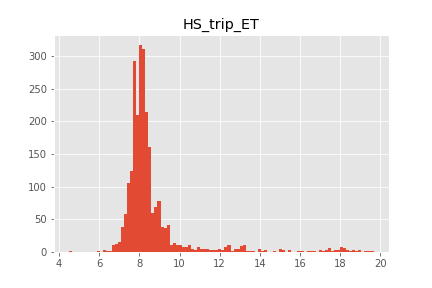

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc8389fac8>]],
      dtype=object)

In [37]:
%matplotlib notebook

tripsIII.hist(column='HS_trip_ET', bins=100)

In [25]:
tripsIII['HS_TOD'].value_counts()

1    2037
2     349
3      46
4      13
0       1
Name: HS_TOD, dtype: int64

In [34]:
tripsIII.HS_trip_ET.quantile(np.linspace(.1, 1, 9, 0))

0.1    7.533333
0.2    7.750000
0.3    7.916667
0.4    8.000000
0.5    8.166667
0.6    8.250000
0.7    8.433333
0.8    8.750000
0.9    9.533333
Name: HS_trip_ET, dtype: float64

In [44]:
# tripsIII['HS_trip_ET'].value_counts()

<IPython.core.display.Javascript object>


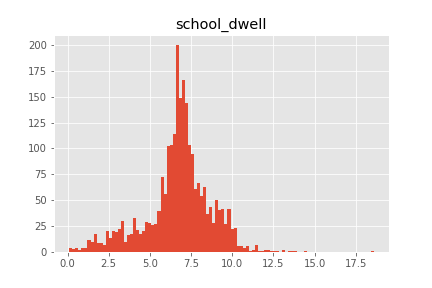

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc8348d2e8>]],
      dtype=object)

In [46]:
%matplotlib notebook

tripsIII.hist(column='school_dwell', bins=100)

In [35]:
tripsIII.school_dwell.quantile(np.linspace(.1, 1, 9, 0))

0.1    3.916667
0.2    5.600000
0.3    6.225000
0.4    6.583333
0.5    6.866667
0.6    7.150000
0.7    7.500000
0.8    8.166667
0.9    9.158333
Name: school_dwell, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcac1c37b8>]],
      dtype=object)

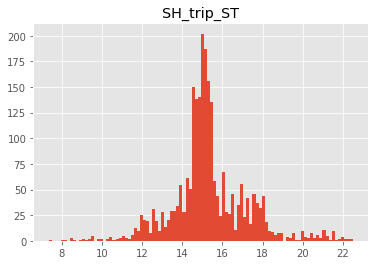

In [27]:
%matplotlib inline

tripsIII.hist(column='SH_trip_ST', bins=100)

In [28]:
tripsIII['Sdwell'] = pd.to_numeric(tripsIII['Sdwell'])
tripsIII['SH_TOD1'] = pd.to_numeric(tripsIII['SH_TOD1'])

## Add the demographic variables

In [29]:
person = pd.read_csv('/home/data/CHTS_csv_format/data/Deliv_PER.csv')

person.head()

,SAMPN,PERNO,RELAT,GEND,AGE,AGEB,HISP,RACE1,RACE2,RACE3,RACE4,O_RACE,NTVTY,CNTRY,LIC,USER,TRANS,TPTYP1,TPTYP2,TPTYP3,TPTYP4,TPTYP5,TPTYP6,TPTYP7,O_TPTYP,CLIP1,CLIP2,CLIP3,COMP,MET,PASSTL,FLEX,EMPLY,WKSTAT,O_WKSTAT,JOBS,WLOC,WNAME,WCITY,WSTAT,...,HVLOG,PTRIPS,TOLLF,TOLLR1,TOLLR2,TOLLR3,TOLLR4,TOLLR5,TOLLR6,TOLLR7,TOLLR8,TOLLR9,TOLLR10,TOLLB1,TOLLB2,TOLLB3,TOLLB4,TOLLB5,TOLLB6,TOLLB7,TOLLB8,TOLLB9,TOLLB10,HOVL,NOGOWHY,NOGOWHY_O,InComplete,Moto_trip,WCTFIP,WTRACT,SCTFIP,STRACT,WPrimaryCity,WSTFIP,W2PrimaryCity,W2STFIP,SPrimaryCity,SSTFIP,PERWGT,EXPPERWGT
0,1031985,1,1,1,74,NaN,2,1.0,NaN,NaN,NaN,NaN,1,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052086,17.647568
1,1031985,2,2,2,73,NaN,2,1.0,NaN,NaN,NaN,NaN,1,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052086,17.647568
2,1032036,1,1,1,46,NaN,2,1.0,NaN,NaN,NaN,NaN,1,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,NaN,NaN,1.0,1.0,HIDDEN,SAN DIEGO,CA,...,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,73.0,17032.0,NaN,NaN,SAN DIEGO,6.0,NaN,NaN,NaN,NaN,1.223974,414.701494
3,1032036,2,2,2,47,NaN,2,1.0,97.0,NaN,NaN,MULTI-RACIAL,1,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.863473,292.558373
4,1032036,3,3,1,15,NaN,2,1.0,97.0,NaN,NaN,MULTI-RACIAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,73.0,17030.0,NaN,NaN,NaN,NaN,SAN DIEGO,6.0,0.941412,318.965100


In [30]:
person = person[['SAMPN','PERNO','GEND','AGE','HISP','RACE1','RACE2','RACE3','RACE4','O_RACE','NTVTY','LIC','JOBS','HOURS','EDUCA','WSCHED','DISAB','INDUS','OCCUP']]

In [31]:
person['HHPER'] = person['SAMPN'].map(str) + person['PERNO'].map(str)

person['female'] = person['GEND'] - 1

person['HISP'] = np.where(person['HISP'] == 2, 0, person['HISP'])
person['white'] = np.where((person['RACE1'].isin([1.0]) | person['RACE2'].isin([1.0]) | person['RACE3'].isin([1.0]) | person['RACE4'].isin([1.0])),1,0)
person['black'] = np.where((person['RACE1'].isin([2.0]) | person['RACE2'].isin([2.0]) | person['RACE3'].isin([2.0]) | person['RACE4'].isin([2.0])),1,0)
person['native'] = np.where((person['RACE1'].isin([3.0]) | person['RACE2'].isin([3.0]) | person['RACE3'].isin([3.0]) | person['RACE4'].isin([3.0])),1,0)
person['asian'] = np.where((person['RACE1'].isin([4.0]) | person['RACE2'].isin([4.0]) | person['RACE3'].isin([4.0]) | person['RACE4'].isin([4.0])),1,0)
person['PI'] = np.where((person['RACE1'].isin([5.0]) | person['RACE2'].isin([5.0]) | person['RACE3'].isin([5.0]) | person['RACE4'].isin([5.0])),1,0)

person['immigrant'] = person['NTVTY'] - 1
person['nolic'] = person['LIC'] - 1
# person['nolic'] = np.where(person['AGE']<16,0,person['nolic'])

person['DISAB'] = np.where(person['DISAB'] == 2, 0, person['HISP'])

person.head()

,SAMPN,PERNO,GEND,AGE,HISP,RACE1,RACE2,RACE3,RACE4,O_RACE,NTVTY,LIC,JOBS,HOURS,EDUCA,WSCHED,DISAB,INDUS,OCCUP,HHPER,female,white,black,native,asian,PI,immigrant,nolic
0,1031985,1,1,74,0,1.0,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,6,NaN,0,NaN,NaN,10319851,0,1,0,0,0,0,0,0.0
1,1031985,2,2,73,0,1.0,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,6,NaN,0,NaN,NaN,10319852,1,1,0,0,0,0,0,0.0
2,1032036,1,1,46,0,1.0,NaN,NaN,NaN,NaN,1,1.0,1.0,40.0,6,2.0,0,54.0,15.0,10320361,0,1,0,0,0,0,0,0.0
3,1032036,2,2,47,0,1.0,97.0,NaN,NaN,MULTI-RACIAL,1,1.0,NaN,NaN,6,NaN,0,NaN,NaN,10320362,1,1,0,0,0,0,0,0.0
4,1032036,3,1,15,0,1.0,97.0,NaN,NaN,MULTI-RACIAL,1,NaN,NaN,NaN,1,NaN,0,NaN,NaN,10320363,0,1,0,0,0,0,0,NaN


In [32]:
hh_df = pd.read_csv('/home/data/CHTS_csv_format/data/Deliv_HH.csv')[
  ['SAMPN','HHVEH','HHBIC','OWN','INCOM','HHSIZ']]

hh_df['rent'] = hh_df['OWN'] - 1

hh_df.head()

,SAMPN,HHVEH,HHBIC,OWN,INCOM,HHSIZ,rent
0,1031985,2,2,1,3,2,0
1,1032036,1,4,1,7,5,0
2,1032053,2,2,2,2,6,1
3,1032425,2,3,1,7,2,0
4,1032558,0,0,2,1,1,1


In [33]:
demo = person.merge(hh_df,on = 'SAMPN',how = 'left')

demo.head()

,SAMPN,PERNO,GEND,AGE,HISP,RACE1,RACE2,RACE3,RACE4,O_RACE,NTVTY,LIC,JOBS,HOURS,EDUCA,WSCHED,DISAB,INDUS,OCCUP,HHPER,female,white,black,native,asian,PI,immigrant,nolic,HHVEH,HHBIC,OWN,INCOM,HHSIZ,rent
0,1031985,1,1,74,0,1.0,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,6,NaN,0,NaN,NaN,10319851,0,1,0,0,0,0,0,0.0,2,2,1,3,2,0
1,1031985,2,2,73,0,1.0,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,6,NaN,0,NaN,NaN,10319852,1,1,0,0,0,0,0,0.0,2,2,1,3,2,0
2,1032036,1,1,46,0,1.0,NaN,NaN,NaN,NaN,1,1.0,1.0,40.0,6,2.0,0,54.0,15.0,10320361,0,1,0,0,0,0,0,0.0,1,4,1,7,5,0
3,1032036,2,2,47,0,1.0,97.0,NaN,NaN,MULTI-RACIAL,1,1.0,NaN,NaN,6,NaN,0,NaN,NaN,10320362,1,1,0,0,0,0,0,0.0,1,4,1,7,5,0
4,1032036,3,1,15,0,1.0,97.0,NaN,NaN,MULTI-RACIAL,1,NaN,NaN,NaN,1,NaN,0,NaN,NaN,10320363,0,1,0,0,0,0,0,NaN,1,4,1,7,5,0


In [34]:
#drop RACE columns, gend, ntvty, lic, own
demo = demo.drop(columns=['GEND','RACE1','RACE2','RACE3','RACE4','O_RACE','NTVTY','LIC','OWN'])

In [35]:
#drop jobs, hours, work schedule, industry, occupation
demo = demo.drop(columns=['JOBS','HOURS','WSCHED','INDUS','OCCUP','nolic'])

In [37]:
na_dict = {
    'female':[8],
    'AGE':[998,999],
#     'RACE':[97,98,99],
    'immigrant':[7,8],
#     'nolic':[7,8],
#     'JOBS':[98,99],
#     'HOURS':[998,999],
    'EDUCA':[8,9],
#     'WSCHED':[8,9],
    'DISAB':[8,9],
    'HHVEH':[98,99],
    'HHBIC':[98,99],
#     'VEHNEW':[8,9],
    'rent':[6,7,8],
    'INCOM':[98,99],
    'HHSIZ':[98,99]
#     'INDUS':[98,99],
#     'OCCUP':[98,99]
}

for col in na_dict:
    for vals in na_dict[col]:
        demo[col] = demo[col].replace(vals,np.nan)
        
# demo.dropna(inplace = True)

In [38]:
demo.isnull().sum(axis = 0)

SAMPN           0
PERNO           0
AGE          3924
HISP            0
EDUCA        2088
DISAB         141
HHPER           0
female        311
white           0
black           0
native          0
asian           0
PI              0
immigrant     325
HHVEH           0
HHBIC         148
INCOM        8839
HHSIZ           0
rent          339
dtype: int64

In [39]:
demo1 = demo.copy()

demo1.dropna(inplace = True)

In [40]:
print (len(person.index))
print (len(hh_df.index))
print (len(demo.index))
print (len(demo1.index))

109113
42431
109113
95690


In [41]:
tripsIII['HHPER'] = tripsIII['HHPER'].map(str)

trips0 = pd.merge(tripsIII, demo, on='HHPER')

trips1 = pd.merge(tripsIII, demo1, on='HHPER')

print (len(tripsIII.index))
print (len(trips0.index))
print (len(trips1.index))

2446
2446
2220


In [42]:
trips1.isnull().sum(axis = 0)

HHPER            0
index            0
Unnamed: 0       0
HHPERTRIP        0
origin           0
home_dwell       0
home_ST          0
HS_trip_ST       0
HS_trip_ET       0
HS_TT            0
HS_mode          0
HXCORD           0
HYCORD           0
SXCORD           0
SYCORD           0
HS_TOD           0
school_dwell     0
school_ST        0
SH_trip_ST       0
SH_trip_ET      17
SH_TT           17
SH_mode          0
SH_TOD           0
SH_TOD1          0
Sdwell           0
TOD              0
SAMPN            0
PERNO            0
AGE              0
HISP             0
EDUCA            0
DISAB            0
female           0
white            0
black            0
native           0
asian            0
PI               0
immigrant        0
HHVEH            0
HHBIC            0
INCOM            0
HHSIZ            0
rent             0
dtype: int64

In [43]:
trips0.isnull().sum(axis = 0)

HHPER             0
index             0
Unnamed: 0        0
HHPERTRIP         0
origin            0
home_dwell        0
home_ST           0
HS_trip_ST        0
HS_trip_ET        0
HS_TT             0
HS_mode           0
HXCORD            0
HYCORD            0
SXCORD            0
SYCORD            0
HS_TOD            0
school_dwell      0
school_ST         0
SH_trip_ST        0
SH_trip_ET       19
SH_TT            19
SH_mode           0
SH_TOD            0
SH_TOD1           0
Sdwell            0
TOD               0
SAMPN             0
PERNO             0
AGE              74
HISP              0
EDUCA             8
DISAB             0
female           12
white             0
black             0
native            0
asian             0
PI                0
immigrant         7
HHVEH             0
HHBIC             0
INCOM           167
HHSIZ             0
rent              7
dtype: int64

In [25]:
# x = trips0.loc[(trips0['INDUS'].isnull()) & (trips0['OCCUP'].isnull())]

# len(x.index)

93

In [80]:
trips1['less10k'] = np.where(trips1['INCOM'].isin([1.0]),1,0)
trips1['10kless25k'] = np.where(trips1['INCOM'].isin([2.0]),1,0)
trips1['25kless35k'] = np.where(trips1['INCOM'].isin([3.0]),1,0)
trips1['35kless50k'] = np.where(trips1['INCOM'].isin([4.0]),1,0)
trips1['50kless75k'] = np.where(trips1['INCOM'].isin([5.0]),1,0)
trips1['75kless100k'] = np.where(trips1['INCOM'].isin([6.0]),1,0)
trips1['100kless150k'] = np.where(trips1['INCOM'].isin([7.0]),1,0)
trips1['150kless200k'] = np.where(trips1['INCOM'].isin([8.0]),1,0)
trips1['200kless250k'] = np.where(trips1['INCOM'].isin([9.0]),1,0)
trips1['250kplus'] = np.where(trips1['INCOM'].isin([10.0]),1,0)

trips1['less50k'] = np.where(trips1['INCOM'].isin([1.0,2.0,3.0,4.0]),1,0)
trips1['less75k'] = np.where(trips1['INCOM'].isin([1.0,2.0,3.0,4.0,5.0]),1,0)
trips1['150kplus'] = np.where(trips1['INCOM'].isin([8.0,9.0,10.0]),1,0)

In [46]:
trips1['lessGED'] = np.where(trips1['EDUCA'].isin([1.0]),1,0)
trips1['GED'] = np.where(trips1['EDUCA'].isin([2.0]),1,0)
trips1['someBach'] = np.where(trips1['EDUCA'].isin([3.0]),1,0)
trips1['Assoc'] = np.where(trips1['EDUCA'].isin([4.0]),1,0)
trips1['Bach'] = np.where(trips1['EDUCA'].isin([5.0]),1,0)
trips1['Grad'] = np.where(trips1['EDUCA'].isin([6.0]),1,0)

In [47]:
trips1['minority'] = np.where(trips1['white'] == 1, 0, 1)

# trips1.rename(columns = {'WSCHED':'flexsched'},inplace = True)

In [48]:
# trips1[['AGE', 'JOBS', 'HOURS', 'HHVEH', 'HHBIC', 'HHSIZ']].describe()

<IPython.core.display.Javascript object>


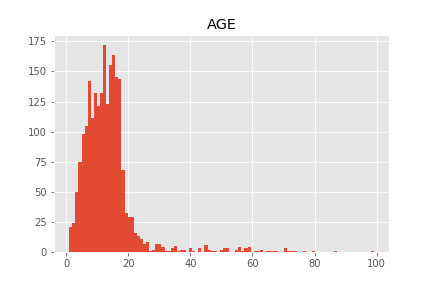

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc80aa63c8>]],
      dtype=object)

In [94]:
%matplotlib notebook

trips1.hist(column='AGE', bins=99)

In [92]:
trips1.AGE.quantile(np.linspace(.1, 1, 9, 0))

0.1     5.0
0.2     7.0
0.3     9.0
0.4    11.0
0.5    12.0
0.6    14.0
0.7    15.0
0.8    17.0
0.9    19.0
Name: AGE, dtype: float64

In [49]:
trips1['less5'] = np.where(((trips1.AGE.between(0,5,inclusive = False)) | (trips1.AGE==0)),1,0)
trips1['5less12'] = np.where(((trips1.AGE.between(5,12,inclusive = False)) | (trips1.AGE==5)),1,0)
trips1['12less16'] = np.where(((trips1.AGE.between(12,16,inclusive = False)) | (trips1.AGE==12)),1,0)
trips1['16less19'] = np.where(((trips1.AGE.between(16,19,inclusive = False)) | (trips1.AGE==16)),1,0)
trips1['19less27'] = np.where(((trips1.AGE.between(19,27,inclusive = False)) | (trips1.AGE==19)),1,0)
trips1['27plus'] = np.where(((trips1.AGE.between(27,100,inclusive = False)) | (trips1.AGE==27)),1,0)

# trips1['16less25'] = np.where(((trips1.AGE.between(16,25,inclusive = False)) | (trips1.AGE==16)),1,0)
# trips1['25less40'] = np.where(((trips1.AGE.between(25,40,inclusive = False)) | (trips1.AGE==25)),1,0)
# trips1['40less50'] = np.where(((trips1.AGE.between(40,50,inclusive = False)) | (trips1.AGE==40)),1,0)
# trips1['50less60'] = np.where(((trips1.AGE.between(50,60,inclusive = False)) | (trips1.AGE==50)),1,0)
# trips1['60less85'] = np.where(((trips1.AGE.between(60,85,inclusive = False)) | (trips1.AGE==60)),1,0)

In [50]:
trips1['noveh'] = np.where(trips1.HHVEH.isin([0.0]),1,0)
trips1['1veh'] = np.where(trips1.HHVEH.isin([1.0]),1,0)
trips1['2veh'] = np.where(trips1.HHVEH.isin([2.0]),1,0)
trips1['3plusveh'] = np.where(trips1.HHVEH.between(3,8,inclusive = True),1,0)

trips1['nobic'] = np.where(trips1.HHBIC.isin([0.0]),1,0)
# trips1['1'] = np.where(trips1.HHVEH.isin([1.0]),1,0)
# trips1['2veh'] = np.where(trips1.HHVEH.isin([2.0]),1,0)
# trips1['3plusveh'] = np.where(trips1.HHVEH.between(3,8,inclusive = True),1,0)

trips1['1per'] = np.where(trips1.HHSIZ.isin([1.0]),1,0)
trips1['2per'] = np.where(trips1.HHSIZ.isin([2.0]),1,0)
trips1['3per'] = np.where(trips1.HHSIZ.isin([3.0]),1,0)
trips1['4plusper'] = np.where(trips1.HHSIZ.between(4,8,inclusive = True),1,0)

## Creating the skims table

### still haven't added walk and bike distances and times (might differ by direction even if not by time)

In [35]:
# skim_dir = '/home/data/fall_2018/mtc_skims'
# distance_EA = pd.read_csv(skim_dir + f'/DistanceSkimsDatabaseEA.csv').replace(-999, 9999)
# distance_AM = pd.read_csv(skim_dir + f'/DistanceSkimsDatabaseAM.csv').replace(-999, 9999)
# distance_MD = pd.read_csv(skim_dir + f'/DistanceSkimsDatabaseMD.csv').replace(-999, 9999)
# distance_PM = pd.read_csv(skim_dir + f'/DistanceSkimsDatabasePM.csv').replace(-999, 9999)
# distance_EV = pd.read_csv(skim_dir + f'/DistanceSkimsDatabaseEV.csv').replace(-999, 9999)

# cost_EA = pd.read_csv(skim_dir + f'/CostSkimsDatabaseEA.csv').replace(-999, 9999)
# cost_AM = pd.read_csv(skim_dir + f'/CostSkimsDatabaseAM.csv').replace(-999, 9999)
# cost_MD = pd.read_csv(skim_dir + f'/CostSkimsDatabaseMD.csv').replace(-999, 9999)
# cost_PM = pd.read_csv(skim_dir + f'/CostSkimsDatabasePM.csv').replace(-999, 9999)
# cost_EV = pd.read_csv(skim_dir + f'/CostSkimsDatabaseEV.csv').replace(-999, 9999)

# Time_EA = pd.read_csv(skim_dir + f'/TimeSkimsDatabaseEA.csv').replace(-999, 9999)
# Time_AM = pd.read_csv(skim_dir + f'/TimeSkimsDatabaseAM.csv').replace(-999, 9999)
# Time_MD = pd.read_csv(skim_dir + f'/TimeSkimsDatabaseMD.csv').replace(-999, 9999)
# Time_PM = pd.read_csv(skim_dir + f'/TimeSkimsDatabasePM.csv').replace(-999, 9999)
# Time_EV = pd.read_csv(skim_dir + f'/TimeSkimsDatabaseEV.csv').replace(-999, 9999)

In [36]:
# distance_EA = distance_EA.rename(
#         columns = dict(zip([i for i in distance_EA.columns if i not in ['orig','dest']],
#          [i+ f'_distance_EA' for i in distance_EA.columns if i not in ['orig','dest']])))

In [37]:
# distance_AM = distance_AM.rename(
#         columns = dict(zip([i for i in distance_AM.columns if i not in ['orig','dest']],
#          [i+ f'_distance_AM' for i in distance_AM.columns if i not in ['orig','dest']])))

In [38]:
# distance_MD = distance_MD.rename(
#         columns = dict(zip([i for i in distance_MD.columns if i not in ['orig','dest']],
#          [i+ f'_distance_MD' for i in distance_MD.columns if i not in ['orig','dest']])))

In [39]:
# distance_PM = distance_PM.rename(
#         columns = dict(zip([i for i in distance_PM.columns if i not in ['orig','dest']],
#          [i+ f'_distance_PM' for i in distance_PM.columns if i not in ['orig','dest']])))

In [40]:
# distance_EV = distance_EV.rename(
#         columns = dict(zip([i for i in distance_EV.columns if i not in ['orig','dest']],
#          [i+ f'_distance_EV' for i in distance_EV.columns if i not in ['orig','dest']])))

In [41]:
# cost_EA = cost_EA.rename(
#         columns = dict(zip([i for i in cost_EA.columns if i not in ['orig','dest']],
#          [i+ f'_cost_EA' for i in cost_EA.columns if i not in ['orig','dest']])))

In [42]:
# cost_AM=cost_AM.rename(
#         columns = dict(zip([i for i in cost_AM.columns if i not in ['orig','dest']],
#          [i+ f'_cost_AM' for i in cost_AM.columns if i not in ['orig','dest']])))

In [43]:
# cost_MD=cost_MD.rename(
#         columns = dict(zip([i for i in cost_MD.columns if i not in ['orig','dest']],
#          [i+ f'_cost_MD' for i in cost_MD.columns if i not in ['orig','dest']])))

In [44]:
# cost_PM= cost_PM.rename(
#         columns = dict(zip([i for i in cost_PM.columns if i not in ['orig','dest']],
#          [i+ f'_cost_PM' for i in cost_PM.columns if i not in ['orig','dest']])))

In [45]:
# cost_EV=cost_EV.rename(
#         columns = dict(zip([i for i in cost_EV.columns if i not in ['orig','dest']],
#          [i+ f'_cost_EV' for i in cost_EV.columns if i not in ['orig','dest']])))

In [46]:
# Time_EA=Time_EA.rename(
#         columns = dict(zip([i for i in Time_EA.columns if i not in ['orig','dest']],
#          [i+ f'_Time_EA' for i in Time_EA.columns if i not in ['orig','dest']])))

In [47]:
# Time_AM=Time_AM.rename(
#         columns = dict(zip([i for i in Time_AM.columns if i not in ['orig','dest']],
#          [i+ f'_Time_AM' for i in Time_AM.columns if i not in ['orig','dest']])))

In [48]:
# Time_MD=Time_MD.rename(
#         columns = dict(zip([i for i in Time_MD.columns if i not in ['orig','dest']],
#          [i+ f'_Time_MD' for i in Time_MD.columns if i not in ['orig','dest']])))

In [49]:
# Time_PM=Time_PM.rename(
#         columns = dict(zip([i for i in Time_PM.columns if i not in ['orig','dest']],
#          [i+ f'_Time_PM' for i in Time_PM.columns if i not in ['orig','dest']])))

In [50]:
# Time_EV=Time_EV.rename(
#         columns = dict(zip([i for i in Time_EV.columns if i not in ['orig','dest']],
#          [i+ f'_Time_EV' for i in Time_EV.columns if i not in ['orig','dest']])))

In [51]:
# data_frames = [distance_EA,distance_AM,distance_MD,distance_PM,distance_EV,
#               cost_EA,cost_AM,cost_MD,cost_PM,cost_EV,
#               Time_EA,Time_AM,Time_MD,Time_PM,Time_EV]
# skims = reduce(lambda  left,right: pd.merge(left,right,on=['orig','dest'],
#                                             how='outer'), data_frames)

In [52]:
# skims.head()

In [53]:
# skims.to_csv('skims_110118.csv')

In [54]:
# skims = pd.read_csv('/home/emma/ual_model_workspace/fall-2018-models/skims_110118.csv')

In [55]:
# zones = trips1[['HHPER','Hzone','Wzone']]

In [56]:
# skims1 = pd.merge(zones, skims, how = 'left', left_on=['Hzone','Wzone'], right_on=['orig','dest'])

In [57]:
# skims2 = pd.merge(skims1, skims, how = 'left', left_on=['Wzone','Hzone'], right_on=['orig','dest'], suffixes=('_HW', '_WH'))

In [58]:
# skims3 = skims2.copy()
# TOD_list = ['EA','AM','MD','PM','EV']
# var_list = ['distance','cost','Time']
# mode_list_1 = ['da','daToll','s2','s2Toll','s3','s3Toll','walk','bike']
# # mode_list_1 = ['da','daToll','s2','s2Toll']
# mode_list_2 = ['da','daToll','s2','s2Toll','s3','s3Toll','wTrnW']
# # mode_list_2 = ['da','daToll','s2','s2Toll','wTrnW','dTrnW','wTrnD']
# mode_list_3 = ['da','daToll','s2','s2Toll','s3','s3Toll','walk','bike','wTrnW']

# for mode in mode_list_1:
# #     for variable in var_list:

#         for tod1 in TOD_list:
#             for tod2 in TOD_list:
#                 col_name = f'{mode}_distance_{tod1}_{tod2}'
#                 skims3[col_name] = skims3[f'{mode}_distance_{tod1}_HW'] + skims3[f'{mode}_distance_{tod2}_WH']

In [59]:
# for mode in mode_list_2:
# #     for variable in var_list:

#         for tod1 in TOD_list:
#             for tod2 in TOD_list:
#                 col_name = f'{mode}_cost_{tod1}_{tod2}'
#                 skims3[col_name] = skims3[f'{mode}_cost_{tod1}_HW'] + skims3[f'{mode}_cost_{tod2}_WH']

In [60]:
# for mode in mode_list_3:
# #     for variable in var_list:

#         for tod1 in TOD_list:
#             for tod2 in TOD_list:
#                 col_name = f'{mode}_Time_{tod1}_{tod2}'
#                 skims3[col_name] = skims3[f'{mode}_Time_{tod1}_HW'] + skims3[f'{mode}_Time_{tod2}_WH']

In [61]:
# var_list2 = ['cost','Time']
# for variable in var_list2:
#     for tod1 in TOD_list:
#         for tod2 in TOD_list:
#                 col_name = f'dTrnW_{variable}_{tod1}_{tod2}'
#                 skims3[col_name] = skims3[f'dTrnW_{variable}_{tod1}_HW'] + skims3[f'wTrnD_{variable}_{tod2}_WH']

In [62]:
# skims3.drop(skims3.filter(regex='_HW').columns, axis = 1, inplace = True)

# skims3.drop(skims3.filter(regex='_WH').columns, axis = 1, inplace = True)

In [63]:
# skims3.head()

In [64]:
# len(skims3.index)

In [65]:
# skims3.to_csv('/home/emma/ual_model_workspace/fall-2018-models/skims3correct_110518.csv')

In [66]:
skims3 = pd.read_csv('/home/emma/ual_model_workspace/fall-2018-models/skims3correct_110518.csv')

In [67]:
skims3.head()

,Unnamed: 0,HHPER,Hzone,Wzone,da_distance_EA_EA,da_distance_EA_AM,da_distance_EA_MD,da_distance_EA_PM,da_distance_EA_EV,da_distance_AM_EA,da_distance_AM_AM,da_distance_AM_MD,da_distance_AM_PM,da_distance_AM_EV,da_distance_MD_EA,da_distance_MD_AM,da_distance_MD_MD,da_distance_MD_PM,da_distance_MD_EV,da_distance_PM_EA,da_distance_PM_AM,da_distance_PM_MD,da_distance_PM_PM,da_distance_PM_EV,da_distance_EV_EA,da_distance_EV_AM,da_distance_EV_MD,da_distance_EV_PM,da_distance_EV_EV,daToll_distance_EA_EA,daToll_distance_EA_AM,daToll_distance_EA_MD,daToll_distance_EA_PM,daToll_distance_EA_EV,daToll_distance_AM_EA,daToll_distance_AM_AM,daToll_distance_AM_MD,daToll_distance_AM_PM,daToll_distance_AM_EV,daToll_distance_MD_EA,...,dTrnW_cost_MD_EA,dTrnW_cost_MD_AM,dTrnW_cost_MD_MD,dTrnW_cost_MD_PM,dTrnW_cost_MD_EV,dTrnW_cost_PM_EA,dTrnW_cost_PM_AM,dTrnW_cost_PM_MD,dTrnW_cost_PM_PM,dTrnW_cost_PM_EV,dTrnW_cost_EV_EA,dTrnW_cost_EV_AM,dTrnW_cost_EV_MD,dTrnW_cost_EV_PM,dTrnW_cost_EV_EV,dTrnW_Time_EA_EA,dTrnW_Time_EA_AM,dTrnW_Time_EA_MD,dTrnW_Time_EA_PM,dTrnW_Time_EA_EV,dTrnW_Time_AM_EA,dTrnW_Time_AM_AM,dTrnW_Time_AM_MD,dTrnW_Time_AM_PM,dTrnW_Time_AM_EV,dTrnW_Time_MD_EA,dTrnW_Time_MD_AM,dTrnW_Time_MD_MD,dTrnW_Time_MD_PM,dTrnW_Time_MD_EV,dTrnW_Time_PM_EA,dTrnW_Time_PM_AM,dTrnW_Time_PM_MD,dTrnW_Time_PM_PM,dTrnW_Time_PM_EV,dTrnW_Time_EV_EA,dTrnW_Time_EV_AM,dTrnW_Time_EV_MD,dTrnW_Time_EV_PM,dTrnW_Time_EV_EV
0,0,10414944,1095.0,1152.0,27.95,27.95,27.95,27.95,27.95,26.38,26.38,26.38,26.38,26.38,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,26.38,26.38,26.38,26.38,26.38,27.95,...,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,96.06,94.77,96.24,95.98,98.59,93.18,91.89,93.36,93.10,95.71,96.24,94.95,96.42,96.16,98.77,95.98,94.69,96.16,95.90,98.51,98.59,97.30,98.77,98.51,101.12
1,1,10417661,241.0,69.0,30.92,30.27,30.27,30.27,30.92,30.92,30.27,30.27,30.27,30.92,30.92,30.27,30.27,30.27,30.92,30.92,30.27,30.27,30.27,30.92,30.92,30.27,30.27,30.27,30.92,30.92,30.27,30.27,30.27,30.92,30.92,30.27,30.27,30.27,30.92,30.92,...,880.0,880.0,832.0,880.0,880.0,928.0,928.0,880.0,928.0,928.0,928.0,928.0,880.0,928.0,928.0,134.55,129.62,130.44,128.65,135.75,129.17,124.24,125.06,123.27,130.37,126.83,121.90,122.72,120.93,128.03,125.33,120.40,121.22,119.43,126.53,132.62,127.69,128.51,126.72,133.82
2,2,10417662,241.0,282.0,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,23.86,...,563.0,804.0,804.0,804.0,804.0,563.0,804.0,804.0,804.0,804.0,563.0,804.0,804.0,804.0,804.0,182.87,156.04,155.30,156.01,183.93,155.54,128.71,127.97,128.68,156.60,153.95,127.12,126.38,127.09,155.01,152.77,125.94,125.20,125.91,153.83,178.16,151.33,150.59,151.30,179.22
3,3,10436132,1004.0,1127.0,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,32.33,...,10328.0,739.0,739.0,739.0,10328.0,10328.0,739.0,739.0,739.0,10328.0,19998.0,10409.0,10409.0,10409.0,19998.0,19998.00,10085.15,10089.02,10088.27,19998.00,10087.52,174.67,178.54,177.79,10087.52,10089.01,176.16,180.03,179.28,10089.01,10088.24,175.39,179.26,178.51,10088.24,19998.00,10085.15,10089.02,10088.27,19998.00
4,4,10456071,908.0,116.0,31.94,34.03,31.94,34.03,31.94,33.77,35.86,33.77,35.86,33.77,31.94,34.03,31.94,34.03,31.94,33.77,35.86,33.77,35.86,33.77,31.94,34.03,31.94,34.03,31.94,31.94,34.03,31.94,34.03,31.94,33.77,35.86,33.77,35.86,33.77,31.94,...,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,104.66,102.11,102.07,102.14,108.25,102.11,99.56,99.52,99.59,105.70,102.07,99.52,99.48,99.55,105.66,102.14,99.59,99.55,99.62,105.73,108.25,105.70,105.66,105.73,111.84


In [68]:
trips1 = trips1.convert_objects(convert_numeric=True)

In [69]:
trips1 = pd.merge(trips1, skims3, how = 'left', on= ['HHPER'])

In [70]:
trips1.TOD.value_counts()

13.0    2346
12.0     573
23.0     420
14.0     404
24.0     377
2.0      201
3.0      196
22.0     164
34.0      73
4.0       23
41.0      18
11.0      15
44.0       9
1.0        6
33.0       4
42.0       3
30.0       1
0.0        1
21.0       1
31.0       1
Name: TOD, dtype: int64

In [71]:
trips1.TOD.value_counts(normalize=True)

13.0    0.485112
12.0    0.118486
23.0    0.086849
14.0    0.083540
24.0    0.077957
2.0     0.041563
3.0     0.040529
22.0    0.033912
34.0    0.015095
4.0     0.004756
41.0    0.003722
11.0    0.003102
44.0    0.001861
1.0     0.001241
33.0    0.000827
42.0    0.000620
30.0    0.000207
0.0     0.000207
21.0    0.000207
31.0    0.000207
Name: TOD, dtype: float64

In [72]:
trips = trips1.loc[trips1['TOD'].isin([2,3,12,13,14,22,23,24])]

In [73]:
trips.TOD.value_counts(normalize=True)

13.0    0.501175
12.0    0.122410
23.0    0.089724
14.0    0.086306
24.0    0.080538
2.0     0.042940
3.0     0.041871
22.0    0.035035
Name: TOD, dtype: float64

In [74]:
# trips.dtypes

In [75]:
# TAZ = pd.read_csv('/home/emma/ual_model_workspace/fall-2018-models/data/MTC_TAZ_accessibility.csv')

In [76]:
# TAZ.head()

In [77]:
# trips.isnull().sum(axis = 0)

In [78]:
# trips = trips.merge(TAZ,left_on = 'Hzone_x',right_on = 'taz1454',how = 'left')

In [79]:
# trips = trips.merge(TAZ,left_on = 'Wzone_x',right_on = 'taz1454',how = 'left', suffixes=('_home', '_work'))

In [80]:
trips = trips.drop(columns=['WH_trip_ET','WH_TT'])
trips.dropna(inplace = True)

In [81]:
# trips.rename(columns = {'bike_15_EA_home':'bike_15_home','bike_30_EA_home':'bike_30_home','bike_45_EA_home':'bike_45_home',
#                        'bike_15_EA_work':'bike_15_work','bike_30_EA_work':'bike_30_work','bike_45_EA_work':'bike_45_work',
#                        'walk_15_EA_home':'walk_15_home','walk_30_EA_home':'walk_30_home','walk_45_EA_home':'walk_45_home',
#                        'walk_15_EA_work':'walk_15_work','walk_30_EA_work':'walk_30_work','walk_45_EA_work':'walk_45_work',},inplace = True)

In [82]:
trips['1plusveh'] = 1 - trips['noveh']
trips['no_higher_ed'] = (trips['EDUCA'] < 5).astype(int)

In [83]:
    # trips['daTime02'] = trips['da_Time_EA_MD']*trips['1plusveh']
    # trips['daTime03'] = trips['da_Time_EA_PM']*trips['1plusveh']
    # trips['daTime12'] = trips['da_Time_AM_MD']*trips['1plusveh']
    # trips['daTime13'] = trips['da_Time_AM_PM']*trips['1plusveh']
    # trips['daTime14'] = trips['da_Time_AM_EV']*trips['1plusveh']
    # trips['daTime22'] = trips['da_Time_MD_MD']*trips['1plusveh']
    # trips['daTime23'] = trips['da_Time_MD_PM']*trips['1plusveh']
    # trips['daTime24'] = trips['da_Time_MD_EV']*trips['1plusveh']

    # trips['wTrnWTime02'] = trips['wTrnW_Time_EA_MD']*trips['noveh']
    # trips['wTrnWTime03'] = trips['wTrnW_Time_EA_PM']*trips['noveh']
    # trips['wTrnWTime12'] = trips['wTrnW_Time_AM_MD']*trips['noveh']
    # trips['wTrnWTime13'] = trips['wTrnW_Time_AM_PM']*trips['noveh']
    # trips['wTrnWTime14'] = trips['wTrnW_Time_AM_EV']*trips['noveh']
    # trips['wTrnWTime22'] = trips['wTrnW_Time_MD_MD']*trips['noveh']
    # trips['wTrnWTime23'] = trips['wTrnW_Time_MD_PM']*trips['noveh']
    # trips['wTrnWTime24'] = trips['wTrnW_Time_MD_EV']*trips['noveh']

In [84]:
# # balanced sampling
# tripsM = pd.concat([trips[trips.TOD == 2].sample(500, random_state = 0, replace=True),
#                     trips[trips.TOD == 3].sample(500, random_state = 0, replace=True),
#                     trips[trips.TOD == 12].sample(500, random_state = 0, replace=True),
#                     trips[trips.TOD == 13].sample(500, random_state = 0, replace=True),
#                     trips[trips.TOD == 14].sample(500, random_state = 0, replace=True),
#                     trips[trips.TOD == 22].sample(500, random_state = 0, replace=True),
#                     trips[trips.TOD == 23].sample(500, random_state = 0, replace=True),
#                     trips[trips.TOD == 24].sample(500, random_state = 0, replace=True),
#                 ])

In [85]:
# tripsM.head()

In [98]:
trips1.SH_TOD1.value_counts()

2    1291
1     367
3     336
4     177
5      49
Name: SH_TOD1, dtype: int64

In [154]:
@orca.table(cache=True)
def tripsA():
    return trips1

In [163]:
#add interaction term with household vehicles and drive skims, and no household veh and transit/bike/walk skims,
#also with owning a bike and bike skims
##this suggests transit/bike/walk skims don't matter for people with cars

#need to combine job accessibility measures by sum of morning and afternoon counts

#should I include any skims? they are a feature of mode, which is chosen after the TOD. If no, why does
#SFCTA include accessibility by both car and transit?

#change age, jobs, hours, hhveh, hhbic, and hhsiz to more interpretable categories?

#test origin_dwell, TT?, use just walk distance?

#should any skims data be included here? because time categories are big enough that mode doesn't really influence choice?
#but then why accessibility variables? (total employment within 15 and 30 min by auto and transit for depart and return periods - 
    #and should that be accessibility around home or work?)

m = SmallMultinomialLogitStep()
m.name = 'STOD_choice'
m.tables = ['tripsA']
m.choice_column = 'SH_TOD1'
m.model_expression = OrderedDict([
    ('intercept', [2,3,4,5]),
 
# # #     ('bike_15_home',[2,22,24]),
# #     ('bike_30_home',[23]),
# # #     ('bike_45_home',[14]),
# # #     ('walk_15_home',[2,3,12,14,22,23,24]),
# #     ('walk_30_home',[12]),
# # #     ('walk_45_home',[2,24]),
    
# # #     ('bike_15_work',[22]),
# # #     ('bike_30_work',[22]),
# # #     ('bike_45_work',[22]),
# # #     ('walk_15_work',[24]),
# # #     ('walk_30_work',[14]),
# # #     ('walk_45_work',[14]),
    
# # # #     ('da_15_EA_home',[2,3]),
# # #     ('da_30_EA_home',[2]),
# # # #     ('da_45_EA_home',[2,3]),
# # #     ('wTrnW_15_EA_home',[3]),
# # # #     ('wTrnW_30_EA_home',[2,3]),
# # # #     ('wTrnW_45_EA_home',[2,3]),
    
# # #     ('da_15_EA_work',[3]),
# # # #     ('da_30_EA_work',[2,3]),
# # #     ('da_45_EA_work',[3]),
# # # #     ('wTrnW_15_EA_work',[2,3]),
# # # #     ('wTrnW_30_EA_work',[2,3]),
# # # #     ('wTrnW_45_EA_work',[2,3]),
    
# # # #     ('da_15_AM_home',[12,13]),
# # # #     ('da_30_AM_home',[12,13]),
# # # #     ('da_45_AM_home',[12,13]),
# # #     ('wTrnW_15_AM_home',[12,13]),
# # # #     ('wTrnW_30_AM_home',[12,13]),
# # #     ('wTrnW_45_AM_home',[12]),
    
# # #     ('da_15_AM_work',[12]),
# # # #     ('da_30_AM_work',[13]),
# # # # #     ('da_45_AM_work',[12,13]),
# # # # #     ('wTrnW_15_AM_work',[12,13]),
# # # #     ('wTrnW_30_AM_work',[12]),
# # # # #     ('wTrnW_45_AM_work',[12,13]),
    
# #     ('da_15_MD_home',[24]),
# # #     ('da_30_MD_home',[2]),
# # #     ('da_45_MD_home',[2,12,22,23,24]),
# # #     ('wTrnW_15_MD_home',[12]),
# #     ('wTrnW_30_MD_home',[23,24]),
# #     ('wTrnW_45_MD_home',[24]),
    
# # #     ('da_15_MD_work',[2,12,22,23,24]),
# # #     ('da_30_MD_work',[22]),
# # # #     ('da_45_MD_work',[2,12,22,23,24]),
# # #     ('wTrnW_15_MD_work',[24]),
# # #     ('wTrnW_30_MD_work',[12]),
# # #     ('wTrnW_45_MD_work',[23]),
    
# # # #     ('da_15_PM_home',[3,13,23]),
# # # #     ('da_30_PM_home',[3,13,23]),
# # # #     ('da_45_PM_home',[3,13,23]),
# # #     ('wTrnW_15_PM_home',[3,13]),
# # #     ('wTrnW_30_PM_home',[23]),
# # #     ('wTrnW_45_PM_home',[3,13,23]),
    
# # # #     ('da_15_PM_work',[13]),
# # # # #     ('da_30_PM_work',[3,13,23]),
# # #     ('da_45_PM_work',[23]),
# # # #     ('wTrnW_15_PM_work',[3,13,23]),
# # # #     ('wTrnW_30_PM_work',[3,13,23]),
# # # #     ('wTrnW_45_PM_work',[3,13,23]),
    
# #     ('da_15_EV_home',[24]),
# # #     ('da_30_EV_home',[24]),
# # #     ('da_45_EV_home',[24]),
# # #     ('wTrnW_15_EV_home',[24]),
# #     ('wTrnW_30_EV_home',[24]),
# # #     ('wTrnW_45_EV_home',[24]),
    
# # # #     ('da_15_EV_work',[24]),
# # # #     ('da_30_EV_work',[24]),
# # # #     ('da_45_EV_work',[24]),
# # #     ('wTrnW_15_EV_work',[24]),
# # # #     ('wTrnW_30_EV_work',[24]),
# # # #     ('wTrnW_45_EV_work',[24]),
    
# #     ('da_distance_EA_MD',[2]),
# #     ('da_distance_EA_PM',[3]),
# #     ('da_distance_AM_MD',[12]),
# #     ('da_distance_AM_EV',[14]),
# #     ('da_distance_MD_MD',[22]),
# #     ('da_distance_MD_PM',[23]),
# #     ('da_distance_MD_EV',[24]),
    
# #     ('da_cost_EA_MD',[2]),
# #     ('da_cost_EA_PM',[3]),
# #     ('da_cost_AM_MD',[12]),
# #     ('da_cost_AM_PM',[13]),
# #     ('da_cost_AM_EV',[14]),
# #     ('da_cost_MD_MD',[22]),
# #     ('da_cost_MD_PM',[23]),
# #     ('da_cost_MD_EV',[24]),
    
# #     ('da_Time_EA_MD',[2]),
# #     ('da_Time_EA_PM',[3]),
#     ('da_Time_AM_MD',[12]),
#     ('da_Time_AM_PM',[13]),
#     ('da_Time_AM_EV',[14]),
#     ('da_Time_MD_MD',[22]),
#     ('da_Time_MD_PM',[23]),
#     ('da_Time_MD_EV',[24]),

# # # #     ('s2_distance_EA',[0,2,3,4]),
# # # #     ('s2_distance_AM',[0,2,3,4]),
# # # #     ('s2_distance_MD',[0,2,3,4]),
# # # #     ('s2_distance_PM',[0,2,3,4]),
# # # #     ('s2_distance_EV',[0,2,3,4]),
# # # #     ('s2_cost_EA',[0,2,3,4]),
# # # #     ('s2_cost_AM',[0,2,3,4]),
# # # #     ('s2_cost_MD',[0,2,3,4]),
# # # #     ('s2_cost_PM',[0,2,3,4]),
# # # #     ('s2_cost_EV',[0,2,3,4]),
# # # #     ('s2_Time_EA',[0,2,3,4]),
# # # #     ('s2_Time_AM',[0,2,3,4]),
# # # #     ('s2_Time_MD',[0,2,3,4]),
# # # #     ('s2_Time_PM',[0,2,3,4]),
# # # #     ('s2_Time_EV',[0,2,3,4]),
    
# #     ('wTrnW_cost_EA_MD',[2]),
# #     ('wTrnW_cost_EA_PM',[3]),
# #     ('wTrnW_cost_AM_MD',[12]),
# #     ('wTrnW_cost_AM_EV',[14]),
# #     ('wTrnW_cost_MD_MD',[22]),
# #     ('wTrnW_cost_MD_PM',[23]),
# #     ('wTrnW_cost_MD_EV',[24]),

# #     ('wTrnW_Time_EA_MD',[2]),
# #     ('wTrnW_Time_EA_PM',[3]),
# #     ('wTrnW_Time_AM_MD',[12]),
# #     ('wTrnW_Time_AM_EV',[14]),
# #     ('wTrnW_Time_MD_MD',[22]),
# #     ('wTrnW_Time_MD_PM',[23]),
# #     ('wTrnW_Time_MD_EV',[24]),
    
# # #     ('dTrnW_cost_EA_MD',[2]),
# # #     ('dTrnW_cost_EA_PM',[3]),
# # #     ('dTrnW_cost_AM_MD',[12]),
# # #     ('dTrnW_cost_AM_PM',[13]),
# # #     ('dTrnW_cost_AM_EV',[14]),
# # #     ('dTrnW_cost_MD_MD',[22]),
# #     ('dTrnW_cost_MD_PM',[23]),
# # #     ('dTrnW_cost_MD_EV',[24]),
    
# # #     ('dTrnW_Time_EA_MD',[2]),
# # #     ('dTrnW_Time_EA_PM',[3]),
# # #     ('dTrnW_Time_AM_MD',[12]),
# # #     ('dTrnW_Time_AM_PM',[13]),
# # #     ('dTrnW_Time_AM_EV',[14]),
# # #     ('dTrnW_Time_MD_MD',[22]),
# #     ('dTrnW_Time_MD_PM',[23]),
# # #     ('dTrnW_Time_MD_EV',[24]),
    
# #     ('bike_distance_AM_PM',[2,3,12,14,22,23,24]),

# #     ('bike_Time_AM_PM',[2,3,12,14,22,23,24]),
    
# #     ('walk_distance_AM_PM',[2,3,12,14,22,23,24]),
    
# #     ('walk_Time_AM_PM',[2,3,12,14,22,23,24]),
    
# # #     ('daTime02',[2]),
# # #     ('daTime03',[3]),
# #     ('daTime12',[12]),
# #     ('daTime13',[13]),
# #     ('daTime14',[14]),
# #     ('daTime22',[22]),
# #     ('daTime23',[23]),
# #     ('daTime24',[24]),
    
# #     ('wTrnWTime02',[2]),
# #     ('wTrnWTime03',[3]),
# #     ('wTrnWTime12',[12]),
# #     ('wTrnWTime13',[13]),
# #     ('wTrnWTime14',[14]),
# #     ('wTrnWTime22',[22]),
# #     ('wTrnWTime23',[23]),
# #     ('wTrnWTime24',[24]),


    
# #     ('AGE',[2,3,12,14,22,23,24]),
    ('less5',[1,3,4]),
#     ('5less12',[1,3,4,5]),
    ('12less16',[1]),
    ('16less19',[1,4]),
    ('19less27',[1,4,5]),
    ('27plus',[1,4,5]),
    
    ('female',[1,4]),
    
#     ('immigrant',[2,3,12,14,22,23,24]),
    
#     ('minority',[1,3]),
#     ('HISP',[1,3,4,5]),
    ('black',[4,5]),
#     ('native',[1,3,4,5]),
    ('asian',[1,3,4]),
#     ('PI',[1,3,4,5]),
 
# #     ('INCOM',[2,3,12,14,22,23,24])
#     ('less10k',[1,3,4,5]),
#     ('10kless25k',[1,3,4,5]),
#     ('25kless35k',[1,3,4,5]),
#     ('35kless50k',[1,3,4,5]),
    
#     ('less50k',[1,3,4,5]),
#     ('50kless75k',[1,3,4,5]),
    
    ('less75k',[1]),    
#     ('75kless100k',[1]),
#     ('100kless150k',[1]),
# # #     ('150kless200k',[2,23,24]),
# # #     ('200kless250k',[2,3]),
# # #     ('250kplus',[2]),
#     ('150kplus',[1]),
    
# #     ('no_higher_ed',[2,3]),
    ('lessGED',[3,4,5]),
#     ('GED',[1,3,4,5]),
#     ('someBach',[1,3,4,5]),
#     ('Assoc',[1,3,4,5]),
#     ('Bach',[1,3,4,5]),
# #     ('Grad')
    
# # #     ('JOBS',[2,3,12,13,22,23,24]),
# #     ('1job',[2,3,12,13,22,23,24]),
#  ***dont have in synthetic pop?    ('2plusjobs',[14,24]),
    
#     ('HOURS',[3,12,14,22,23,24]),
#     ('35hoursorless',[2,3,12,14,22,23,24]),
# # #     ('35to45hours',[2,3,12,13,22,23,24]),
#     ('over45hours',[2,3,12,14,22,23,24]),
    
#  ***dont have in synthetic pop ('flexsched',[22,23,24]),
    
#     ('DISAB',[1,3,4]),
    
#  ***dont have in synthetic pop ('nolic',[23]),
    
# # # #     ('HHVEH',[2,3,12,14,22,23,24]),
#     ('noveh',[1,3,4,5]),
# # #     ('1veh',[2,3,12,14,22,23,24]),
# # #     ('2veh',[2,3,12,14,22,23,24]),
# # #     ('3plusveh',[2,3,12,14,22,23,24]),
    
# # #     ('HHBIC',[2,3,12,14,22,23,24]),
#     ('nobic',[2,3,12,14,22,23,24]),
    
# # # #     ('HHSIZ',[2,3,12,14,22,23,24]),
#     ('1per',[1,3,4,5]),
# #     ('2per',[3,22,23]),
# #     ('3per',[3,22,23,24]),
# #     ('4plusper',[3,22,23,24]),
    
    ('rent',[4]),
    
])

In [164]:
m.fit()

Log-likelihood at zero: -3,572.9522
Initial Log-likelihood: -3,572.9522
Estimation Time for Point Estimation: 0.12 seconds.
Final log-likelihood: -2,146.3901
                     Multinomial Logit Model Regression Results                    
Dep. Variable:                     _chosen   No. Observations:                2,220
Model:             Multinomial Logit Model   Df Residuals:                    2,192
Method:                                MLE   Df Model:                           28
Date:                     Wed, 27 Feb 2019   Pseudo R-squ.:                   0.399
Time:                             22:51:43   Pseudo R-bar-squ.:               0.391
AIC:                             4,348.780   Log-Likelihood:             -2,146.390
BIC:                             4,508.528   LL-Null:                    -3,572.952
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept_

In [91]:
@orca.table(cache=True)
def tripsB():
    return trips1

In [152]:
#add interaction term with household vehicles and drive skims, and no household veh and transit/bike/walk skims,
#also with owning a bike and bike skims
##this suggests transit/bike/walk skims don't matter for people with cars

#need to combine job accessibility measures by sum of morning and afternoon counts

#should I include any skims? they are a feature of mode, which is chosen after the TOD. If no, why does
#SFCTA include accessibility by both car and transit?

#change age, jobs, hours, hhveh, hhbic, and hhsiz to more interpretable categories?

#test origin_dwell, TT?, use just walk distance?

#should any skims data be included here? because time categories are big enough that mode doesn't really influence choice?
#but then why accessibility variables? (total employment within 15 and 30 min by auto and transit for depart and return periods - 
    #and should that be accessibility around home or work?)

m = SmallMultinomialLogitStep()
m.name = 'Sdwell_choice'
m.tables = ['tripsB']
m.choice_column = 'Sdwell'
m.model_expression = OrderedDict([
    ('intercept', [1,3,4,5]),
 
# # #     ('bike_15_home',[2,22,24]),
# #     ('bike_30_home',[23]),
# # #     ('bike_45_home',[14]),
# # #     ('walk_15_home',[2,3,12,14,22,23,24]),
# #     ('walk_30_home',[12]),
# # #     ('walk_45_home',[2,24]),
    
# # #     ('bike_15_work',[22]),
# # #     ('bike_30_work',[22]),
# # #     ('bike_45_work',[22]),
# # #     ('walk_15_work',[24]),
# # #     ('walk_30_work',[14]),
# # #     ('walk_45_work',[14]),
    
# # # #     ('da_15_EA_home',[2,3]),
# # #     ('da_30_EA_home',[2]),
# # # #     ('da_45_EA_home',[2,3]),
# # #     ('wTrnW_15_EA_home',[3]),
# # # #     ('wTrnW_30_EA_home',[2,3]),
# # # #     ('wTrnW_45_EA_home',[2,3]),
    
# # #     ('da_15_EA_work',[3]),
# # # #     ('da_30_EA_work',[2,3]),
# # #     ('da_45_EA_work',[3]),
# # # #     ('wTrnW_15_EA_work',[2,3]),
# # # #     ('wTrnW_30_EA_work',[2,3]),
# # # #     ('wTrnW_45_EA_work',[2,3]),
    
# # # #     ('da_15_AM_home',[12,13]),
# # # #     ('da_30_AM_home',[12,13]),
# # # #     ('da_45_AM_home',[12,13]),
# # #     ('wTrnW_15_AM_home',[12,13]),
# # # #     ('wTrnW_30_AM_home',[12,13]),
# # #     ('wTrnW_45_AM_home',[12]),
    
# # #     ('da_15_AM_work',[12]),
# # # #     ('da_30_AM_work',[13]),
# # # # #     ('da_45_AM_work',[12,13]),
# # # # #     ('wTrnW_15_AM_work',[12,13]),
# # # #     ('wTrnW_30_AM_work',[12]),
# # # # #     ('wTrnW_45_AM_work',[12,13]),
    
# #     ('da_15_MD_home',[24]),
# # #     ('da_30_MD_home',[2]),
# # #     ('da_45_MD_home',[2,12,22,23,24]),
# # #     ('wTrnW_15_MD_home',[12]),
# #     ('wTrnW_30_MD_home',[23,24]),
# #     ('wTrnW_45_MD_home',[24]),
    
# # #     ('da_15_MD_work',[2,12,22,23,24]),
# # #     ('da_30_MD_work',[22]),
# # # #     ('da_45_MD_work',[2,12,22,23,24]),
# # #     ('wTrnW_15_MD_work',[24]),
# # #     ('wTrnW_30_MD_work',[12]),
# # #     ('wTrnW_45_MD_work',[23]),
    
# # # #     ('da_15_PM_home',[3,13,23]),
# # # #     ('da_30_PM_home',[3,13,23]),
# # # #     ('da_45_PM_home',[3,13,23]),
# # #     ('wTrnW_15_PM_home',[3,13]),
# # #     ('wTrnW_30_PM_home',[23]),
# # #     ('wTrnW_45_PM_home',[3,13,23]),
    
# # # #     ('da_15_PM_work',[13]),
# # # # #     ('da_30_PM_work',[3,13,23]),
# # #     ('da_45_PM_work',[23]),
# # # #     ('wTrnW_15_PM_work',[3,13,23]),
# # # #     ('wTrnW_30_PM_work',[3,13,23]),
# # # #     ('wTrnW_45_PM_work',[3,13,23]),
    
# #     ('da_15_EV_home',[24]),
# # #     ('da_30_EV_home',[24]),
# # #     ('da_45_EV_home',[24]),
# # #     ('wTrnW_15_EV_home',[24]),
# #     ('wTrnW_30_EV_home',[24]),
# # #     ('wTrnW_45_EV_home',[24]),
    
# # # #     ('da_15_EV_work',[24]),
# # # #     ('da_30_EV_work',[24]),
# # # #     ('da_45_EV_work',[24]),
# # #     ('wTrnW_15_EV_work',[24]),
# # # #     ('wTrnW_30_EV_work',[24]),
# # # #     ('wTrnW_45_EV_work',[24]),
    
# #     ('da_distance_EA_MD',[2]),
# #     ('da_distance_EA_PM',[3]),
# #     ('da_distance_AM_MD',[12]),
# #     ('da_distance_AM_EV',[14]),
# #     ('da_distance_MD_MD',[22]),
# #     ('da_distance_MD_PM',[23]),
# #     ('da_distance_MD_EV',[24]),
    
# #     ('da_cost_EA_MD',[2]),
# #     ('da_cost_EA_PM',[3]),
# #     ('da_cost_AM_MD',[12]),
# #     ('da_cost_AM_PM',[13]),
# #     ('da_cost_AM_EV',[14]),
# #     ('da_cost_MD_MD',[22]),
# #     ('da_cost_MD_PM',[23]),
# #     ('da_cost_MD_EV',[24]),
    
# #     ('da_Time_EA_MD',[2]),
# #     ('da_Time_EA_PM',[3]),
#     ('da_Time_AM_MD',[12]),
#     ('da_Time_AM_PM',[13]),
#     ('da_Time_AM_EV',[14]),
#     ('da_Time_MD_MD',[22]),
#     ('da_Time_MD_PM',[23]),
#     ('da_Time_MD_EV',[24]),

# # # #     ('s2_distance_EA',[0,2,3,4]),
# # # #     ('s2_distance_AM',[0,2,3,4]),
# # # #     ('s2_distance_MD',[0,2,3,4]),
# # # #     ('s2_distance_PM',[0,2,3,4]),
# # # #     ('s2_distance_EV',[0,2,3,4]),
# # # #     ('s2_cost_EA',[0,2,3,4]),
# # # #     ('s2_cost_AM',[0,2,3,4]),
# # # #     ('s2_cost_MD',[0,2,3,4]),
# # # #     ('s2_cost_PM',[0,2,3,4]),
# # # #     ('s2_cost_EV',[0,2,3,4]),
# # # #     ('s2_Time_EA',[0,2,3,4]),
# # # #     ('s2_Time_AM',[0,2,3,4]),
# # # #     ('s2_Time_MD',[0,2,3,4]),
# # # #     ('s2_Time_PM',[0,2,3,4]),
# # # #     ('s2_Time_EV',[0,2,3,4]),
    
# #     ('wTrnW_cost_EA_MD',[2]),
# #     ('wTrnW_cost_EA_PM',[3]),
# #     ('wTrnW_cost_AM_MD',[12]),
# #     ('wTrnW_cost_AM_EV',[14]),
# #     ('wTrnW_cost_MD_MD',[22]),
# #     ('wTrnW_cost_MD_PM',[23]),
# #     ('wTrnW_cost_MD_EV',[24]),

# #     ('wTrnW_Time_EA_MD',[2]),
# #     ('wTrnW_Time_EA_PM',[3]),
# #     ('wTrnW_Time_AM_MD',[12]),
# #     ('wTrnW_Time_AM_EV',[14]),
# #     ('wTrnW_Time_MD_MD',[22]),
# #     ('wTrnW_Time_MD_PM',[23]),
# #     ('wTrnW_Time_MD_EV',[24]),
    
# # #     ('dTrnW_cost_EA_MD',[2]),
# # #     ('dTrnW_cost_EA_PM',[3]),
# # #     ('dTrnW_cost_AM_MD',[12]),
# # #     ('dTrnW_cost_AM_PM',[13]),
# # #     ('dTrnW_cost_AM_EV',[14]),
# # #     ('dTrnW_cost_MD_MD',[22]),
# #     ('dTrnW_cost_MD_PM',[23]),
# # #     ('dTrnW_cost_MD_EV',[24]),
    
# # #     ('dTrnW_Time_EA_MD',[2]),
# # #     ('dTrnW_Time_EA_PM',[3]),
# # #     ('dTrnW_Time_AM_MD',[12]),
# # #     ('dTrnW_Time_AM_PM',[13]),
# # #     ('dTrnW_Time_AM_EV',[14]),
# # #     ('dTrnW_Time_MD_MD',[22]),
# #     ('dTrnW_Time_MD_PM',[23]),
# # #     ('dTrnW_Time_MD_EV',[24]),
    
# #     ('bike_distance_AM_PM',[2,3,12,14,22,23,24]),

# #     ('bike_Time_AM_PM',[2,3,12,14,22,23,24]),
    
# #     ('walk_distance_AM_PM',[2,3,12,14,22,23,24]),
    
# #     ('walk_Time_AM_PM',[2,3,12,14,22,23,24]),
    
# # #     ('daTime02',[2]),
# # #     ('daTime03',[3]),
# #     ('daTime12',[12]),
# #     ('daTime13',[13]),
# #     ('daTime14',[14]),
# #     ('daTime22',[22]),
# #     ('daTime23',[23]),
# #     ('daTime24',[24]),
    
# #     ('wTrnWTime02',[2]),
# #     ('wTrnWTime03',[3]),
# #     ('wTrnWTime12',[12]),
# #     ('wTrnWTime13',[13]),
# #     ('wTrnWTime14',[14]),
# #     ('wTrnWTime22',[22]),
# #     ('wTrnWTime23',[23]),
# #     ('wTrnWTime24',[24]),


    
# #     ('AGE',[2,3,12,14,22,23,24]),
    ('less5',[1,2,4,5]),
#     ('5less12',[1,3,4,5]),
    ('12less16',[2]),
    ('16less19',[1,5]),
    ('19less27',[1]),
    ('27plus',[1,2]),
    
#     ('female',[1,2,4,5]),
    
#     ('immigrant',[2,3,12,14,22,23,24]),
    
    ('minority',[5]),
#     ('HISP',[2]),
# #     ('black',[1,2,4,5]),
# #     ('native',[1,2,4,5]),
#     ('asian',[4,5]),
# #     ('PI',[1,2,4,5]),
 
# #     ('INCOM',[2,3,12,14,22,23,24])
#     ('less10k',[1,2,4,5]),
#     ('10kless25k',[1,2,4,5]),
#     ('25kless35k',[1,2,4,5]),
#     ('35kless50k',[1,2,4,5]),
    
#     ('less50k',[1,3,4,5]),
#     ('50kless75k',[1,2,4,5]),
    
#     ('less75k',[1,2,4,5]),    
#     ('75kless100k',[1,2,4,5]),
#     ('100kless150k',[1,2,4,5]),
# #     ('150kless200k',[2,23,24]),
# #     ('200kless250k',[2,3]),
# #     ('250kplus',[2]),
    ('150kplus',[2]),
    
# #     ('no_higher_ed',[2,3]),
    ('lessGED',[1,2,4,5]),
#     ('GED',[1,2,4,5]),
#     ('someBach',[1,2,4,5]),
#     ('Assoc',[1,2,4,5]),
#     ('Bach',[1,2,4,5]),
# #     ('Grad')
    
# # #     ('JOBS',[2,3,12,13,22,23,24]),
# #     ('1job',[2,3,12,13,22,23,24]),
#  ***dont have in synthetic pop?    ('2plusjobs',[14,24]),
    
#     ('HOURS',[3,12,14,22,23,24]),
#     ('35hoursorless',[2,3,12,14,22,23,24]),
# # #     ('35to45hours',[2,3,12,13,22,23,24]),
#     ('over45hours',[2,3,12,14,22,23,24]),
    
#  ***dont have in synthetic pop ('flexsched',[22,23,24]),
    
#  ***dont have in synthetic pop ('DISAB',[1,2,3,4]),
    
#  ***dont have in synthetic pop ('nolic',[23]),
    
# # # #     ('HHVEH',[2,3,12,14,22,23,24]),
#     ('noveh',[1,3,4,5]),
# # #     ('1veh',[2,3,12,14,22,23,24]),
# # #     ('2veh',[2,3,12,14,22,23,24]),
# # #     ('3plusveh',[2,3,12,14,22,23,24]),
    
# # #     ('HHBIC',[2,3,12,14,22,23,24]),
#     ('nobic',[2,3,12,14,22,23,24]),
    
# # # #     ('HHSIZ',[2,3,12,14,22,23,24]),
#     ('1per',[1,2,4,5]),
# #     ('2per',[3,22,23]),
# #     ('3per',[3,22,23,24]),
    ('4plusper',[4,5]),
    
#     ('rent',[1,2,4,5]),
    
])

In [153]:
m.fit()

Log-likelihood at zero: -3,572.9522
Initial Log-likelihood: -3,572.9522
Estimation Time for Point Estimation: 0.09 seconds.
Final log-likelihood: -2,473.8736
                     Multinomial Logit Model Regression Results                    
Dep. Variable:                     _chosen   No. Observations:                2,220
Model:             Multinomial Logit Model   Df Residuals:                    2,198
Method:                                MLE   Df Model:                           22
Date:                     Wed, 27 Feb 2019   Pseudo R-squ.:                   0.308
Time:                             22:44:24   Pseudo R-bar-squ.:               0.301
AIC:                             4,991.747   Log-Likelihood:             -2,473.874
BIC:                             5,117.263   LL-Null:                    -3,572.952
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept_

In [89]:
m.model_expression

OrderedDict([('intercept', [2, 3, 12, 13, 22, 23, 24]),
             ('da_Time_AM_MD', [12]),
             ('da_Time_AM_PM', [13]),
             ('da_Time_AM_EV', [14]),
             ('da_Time_MD_MD', [22]),
             ('da_Time_MD_PM', [23]),
             ('da_Time_MD_EV', [24]),
             ('construction', [3, 12]),
             ('manufacturing', [12, 23]),
             ('sector_retail', [2, 3, 14, 23, 24]),
             ('info', [2, 3, 12]),
             ('finance', [2, 12, 24]),
             ('scitech', [14]),
             ('educ', [3, 12, 22, 24]),
             ('health', [3, 23]),
             ('services', [2, 3]),
             ('gov', [14, 22, 23, 24]),
             ('16less25', [23, 24]),
             ('female', [2, 3]),
             ('minority', [14, 24]),
             ('150kplus', [2, 24]),
             ('lessGED', [2, 3]),
             ('GED', [2, 3]),
             ('someBach', [2, 3]),
             ('Assoc', [2, 3]),
             ('Bach', [2]),
             ('HOURS', [3

In [90]:
# m.model_expression_keys

In [91]:
import inspect

In [92]:
print(inspect.getsource(m.to_dict))

    def to_dict(self):
        """
        Create a dictionary representation of the object.
        
        Returns
        -------
        dict
        
        """
        tmp_model_expression = self.model_expression
        self.model_expression = None
        
        d = TemplateStep.to_dict(self)
        self.model_expression = tmp_model_expression
        
        # Can't store OrderedDicts in YAML, so convert them
        if tmp_model_expression is not None:
            d.update({
                'model_expression_keys': [k for (k,v) in tmp_model_expression.items()],
                'model_expression_values': [v for (k,v) in tmp_model_expression.items()],
            })
            
        if self.model_labels is not None:
            d.update({
                'model_label_keys': [k for (k,v) in self.model_labels.items()],
                'model_label_values': [v for (k,v) in self.model_labels.items()]
            })
        
        # Add parameters not in parent class
   

In [93]:
# # feature selection with random forest
# import sklearn
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score

In [94]:
# rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [95]:
# # balanced sampling
# tripsZ = pd.concat([trips[trips.TOD == 2].sample(10000, random_state = 0, replace=True),
#                     trips[trips.TOD == 3].sample(10000, random_state = 0, replace=True),
#                     trips[trips.TOD == 12].sample(10000, random_state = 0, replace=True),
#                     trips[trips.TOD == 13].sample(10000, random_state = 0, replace=True),
#                     trips[trips.TOD == 14].sample(10000, random_state = 0, replace=True),
#                     trips[trips.TOD == 22].sample(10000, random_state = 0, replace=True),
#                     trips[trips.TOD == 23].sample(10000, random_state = 0, replace=True),
#                     trips[trips.TOD == 24].sample(10000, random_state = 0, replace=True),
#                 ])

In [96]:
# tripsZ['TOD'].hist(bins=25)

In [97]:
# cols = list(tripsZ.columns)

# cols.remove('TOD')
# cols.remove('HW_mode')
# cols.remove('WH_mode')
# cols.remove('origin')
# cols.remove('HHPER')
# cols.remove('HHPERTRIP')
# cols.remove('index')
# cols.remove('Unnamed: 0_x')
# cols.remove('home_dwell')
# cols.remove('home_ST')
# cols.remove('HW_trip_ST')
# cols.remove('HW_trip_ET')
# cols.remove('HW_TT')
# cols.remove('Hzone_x')
# cols.remove('Wzone_x')
# cols.remove('Hxcord')
# cols.remove('Hycord')
# cols.remove('Wxcord')
# cols.remove('Wycord')
# cols.remove('HW_TOD')
# cols.remove('work_dwell')
# cols.remove('work_ST')
# cols.remove('WH_trip_ST')
# cols.remove('WH_TOD')
# cols.remove('SAMPN')
# cols.remove('flexsched')
# cols.remove('INDUS')
# cols.remove('OCCUP')
# cols.remove('nolic')
# cols.remove('INCOM')
# cols.remove('EDUCA')

In [98]:
# trips[cols].head()

In [99]:
# trips.head()

In [100]:
# X0 = tripsZ[cols]
# y = tripsZ['TOD']

# rf.fit(X0,y) 
# importances = rf.feature_importances_
# indices = np.argsort(importances)[::-1]

In [101]:
# plt.figure(figsize = (20,20))
# plt.title("Feature importances")
# plt.barh(range(X0.shape[1]), importances[indices],
#        color="r", align="center")
# plt.axvline(importances.mean())
# plt.yticks(range(X0.shape[1]), X0.columns[indices])
# plt.ylim([-1, X0.shape[1]])
# plt.show()

In [102]:
# # list of above-average features:
# X0.columns[importances>importances.mean()].tolist()

In [103]:
# pd.get_option("display.max_rows")

In [104]:
# # cross validation
# tripsY = tripsZ.sample(30000,random_state = 99)
# from sklearn.model_selection import cross_val_score
# cross_val_score(rf, tripsY[X0.columns[importances>importances.mean()]],tripsY['TOD'],cv = 10)

In [105]:
m

In [106]:
m.name = 'TOD_choice'

In [107]:
m.tags = ['TOD_choice','emma','test']
mm.register(m)

Saving 'TOD_choice.yaml': /home/emma/ual_model_workspace/fall-2018-models/configs
Model saved to configs/TOD_choice-model-object.pkl
Registering model step 'TOD_choice'


In [108]:
m = mm.get_step('TOD_choice')

In [109]:
m.model_expression

OrderedDict([('intercept', [2, 3, 12, 13, 22, 23, 24]),
             ('da_Time_AM_MD', [12]),
             ('da_Time_AM_PM', [13]),
             ('da_Time_AM_EV', [14]),
             ('da_Time_MD_MD', [22]),
             ('da_Time_MD_PM', [23]),
             ('da_Time_MD_EV', [24]),
             ('construction', [3, 12]),
             ('manufacturing', [12, 23]),
             ('sector_retail', [2, 3, 14, 23, 24]),
             ('info', [2, 3, 12]),
             ('finance', [2, 12, 24]),
             ('scitech', [14]),
             ('educ', [3, 12, 22, 24]),
             ('health', [3, 23]),
             ('services', [2, 3]),
             ('gov', [14, 22, 23, 24]),
             ('16less25', [23, 24]),
             ('female', [2, 3]),
             ('minority', [14, 24]),
             ('150kplus', [2, 24]),
             ('lessGED', [2, 3]),
             ('GED', [2, 3]),
             ('someBach', [2, 3]),
             ('Assoc', [2, 3]),
             ('Bach', [2]),
             ('HOURS', [3

In [110]:
obs = pd.read_csv('obs_120718.csv')

In [116]:
obs['HOURS'] = obs['hours']

In [120]:
obs['TOD'] = None

In [121]:
@orca.table(cache=True)
def tripsA():
    return obs

In [112]:
m.model_expression

OrderedDict([('intercept', [2, 3, 12, 13, 22, 23, 24]),
             ('da_Time_AM_MD', [12]),
             ('da_Time_AM_PM', [13]),
             ('da_Time_AM_EV', [14]),
             ('da_Time_MD_MD', [22]),
             ('da_Time_MD_PM', [23]),
             ('da_Time_MD_EV', [24]),
             ('construction', [3, 12]),
             ('manufacturing', [12, 23]),
             ('sector_retail', [2, 3, 14, 23, 24]),
             ('info', [2, 3, 12]),
             ('finance', [2, 12, 24]),
             ('scitech', [14]),
             ('educ', [3, 12, 22, 24]),
             ('health', [3, 23]),
             ('services', [2, 3]),
             ('gov', [14, 22, 23, 24]),
             ('16less25', [23, 24]),
             ('female', [2, 3]),
             ('minority', [14, 24]),
             ('150kplus', [2, 24]),
             ('lessGED', [2, 3]),
             ('GED', [2, 3]),
             ('someBach', [2, 3]),
             ('Assoc', [2, 3]),
             ('Bach', [2]),
             ('HOURS', [3

In [122]:
m.run()

In [123]:
obs.head()

,Unnamed: 0,zone_id_home,zone_id_work,age,edu,sex,hours,hispanic,race_id,income,persons,sector_id,occupation_id,da_Time_AM_MD,da_Time_AM_PM,da_Time_AM_EV,da_Time_MD_MD,da_Time_MD_PM,da_Time_MD_EV,150kplus,lessGED,GED,someBach,Assoc,Bach,female,white,minority,16less25,1per,sector_retail,health,info,scitech,manufacturing,educ,services,construction,gov,finance,HOURS,TOD
0,0,557.0,583.0,47,22.0,1,40.0,1,1,85000.0,1,45.0,15.0,24.48,24.66,24.19,24.53,24.71,24.24,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,40.0,13
1,1,539.0,490.0,47,22.0,1,40.0,1,1,85000.0,1,61.0,25.0,31.26,32.37,31.00,30.50,31.61,30.24,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,40.0,12
2,2,539.0,354.0,47,22.0,1,40.0,1,1,85000.0,1,61.0,25.0,56.30,59.37,55.43,52.82,55.89,51.95,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,40.0,13
3,3,558.0,557.0,47,22.0,1,40.0,1,1,85000.0,1,92.0,23.0,11.45,11.45,11.44,11.45,11.45,11.44,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,40.0,12
4,4,558.0,700.0,47,22.0,1,40.0,1,1,85000.0,1,44.0,43.0,57.37,57.77,56.37,57.31,57.71,56.31,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,40.0,13


In [124]:
obs.TOD.value_counts()

13    1392705
12     304308
2      299700
24     274154
14     260239
23     235036
3      218200
22      76654
Name: TOD, dtype: int64

In [125]:
obs.TOD.value_counts(normalize=True)

13    0.454984
12    0.099415
2     0.097909
24    0.089564
14    0.085018
23    0.076784
3     0.071284
22    0.025042
Name: TOD, dtype: float64

In [126]:
trips.TOD.value_counts(normalize=True)

13.0    0.501175
12.0    0.122410
23.0    0.089724
14.0    0.086306
24.0    0.080538
2.0     0.042940
3.0     0.041871
22.0    0.035035
Name: TOD, dtype: float64

In [127]:
trips.head()

,HHPER,index,Unnamed: 0_x,HHPERTRIP,origin,home_dwell,home_ST,HW_trip_ST,HW_trip_ET,HW_TT,Hzone_x,Wzone_x,Hxcord,Hycord,Wxcord,Wycord,HW_mode,HW_TOD,work_dwell,work_ST,WH_trip_ST,WH_mode,WH_TOD,TOD,SAMPN,PERNO,AGE,HISP,JOBS,HOURS,EDUCA,flexsched,DISAB,INDUS,OCCUP,female,white,black,native,asian,...,dTrnW_cost_MD_MD,dTrnW_cost_MD_PM,dTrnW_cost_MD_EV,dTrnW_cost_PM_EA,dTrnW_cost_PM_AM,dTrnW_cost_PM_MD,dTrnW_cost_PM_PM,dTrnW_cost_PM_EV,dTrnW_cost_EV_EA,dTrnW_cost_EV_AM,dTrnW_cost_EV_MD,dTrnW_cost_EV_PM,dTrnW_cost_EV_EV,dTrnW_Time_EA_EA,dTrnW_Time_EA_AM,dTrnW_Time_EA_MD,dTrnW_Time_EA_PM,dTrnW_Time_EA_EV,dTrnW_Time_AM_EA,dTrnW_Time_AM_AM,dTrnW_Time_AM_MD,dTrnW_Time_AM_PM,dTrnW_Time_AM_EV,dTrnW_Time_MD_EA,dTrnW_Time_MD_AM,dTrnW_Time_MD_MD,dTrnW_Time_MD_PM,dTrnW_Time_MD_EV,dTrnW_Time_PM_EA,dTrnW_Time_PM_AM,dTrnW_Time_PM_MD,dTrnW_Time_PM_PM,dTrnW_Time_PM_EV,dTrnW_Time_EV_EA,dTrnW_Time_EV_AM,dTrnW_Time_EV_MD,dTrnW_Time_EV_PM,dTrnW_Time_EV_EV,1plusveh,no_higher_ed
0,10414944,2,2,1.041494e+09,home,14.500000,18.000000,8.500000,8.750000,0.250000,1095.0,1152.0,-122.091521,38.010760,-122.118103,37.885783,drive_alone,1,8.750000,8.750000,17.50,drive_alone,3.0,13.0,1041494,4,36.0,0,2.0,8.0,2.0,2.0,0.0,71.0,27.0,1.0,0,0,1,0,...,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,96.06,94.77,96.24,95.98,98.59,93.18,91.89,93.36,93.10,95.71,96.24,94.95,96.42,96.16,98.77,95.98,94.69,96.16,95.90,98.51,98.59,97.30,98.77,98.51,101.12,1,1
1,10417661,4,4,1.041766e+09,home,13.250000,18.750000,8.000000,9.000000,1.000000,241.0,69.0,-122.414811,37.610585,-122.447100,37.779020,drive_alone,1,8.500000,9.000000,17.50,drive_alone,3.0,13.0,1041766,1,43.0,0,1.0,40.0,6.0,2.0,0.0,62.0,29.0,1.0,0,0,0,1,...,832.0,880.0,880.0,928.0,928.0,880.0,928.0,928.0,928.0,928.0,880.0,928.0,928.0,134.55,129.62,130.44,128.65,135.75,129.17,124.24,125.06,123.27,130.37,126.83,121.90,122.72,120.93,128.03,125.33,120.40,121.22,119.43,126.53,132.62,127.69,128.51,126.72,133.82,1,0
2,10417662,6,6,1.041766e+09,home,13.000000,19.000000,8.000000,8.500000,0.500000,241.0,282.0,-122.414811,37.610585,-122.328418,37.536798,drive_alone,1,10.000000,8.500000,18.50,drive_alone,4.0,14.0,1041766,2,44.0,0,1.0,60.0,3.0,2.0,0.0,51.0,15.0,0.0,0,0,0,1,...,804.0,804.0,804.0,563.0,804.0,804.0,804.0,804.0,563.0,804.0,804.0,804.0,804.0,182.87,156.04,155.30,156.01,183.93,155.54,128.71,127.97,128.68,156.60,153.95,127.12,126.38,127.09,155.01,152.77,125.94,125.20,125.91,153.83,178.16,151.33,150.59,151.30,179.22,1,1
3,10436132,8,8,1.043613e+09,home,11.866667,19.400000,7.266667,7.866667,0.600000,1004.0,1127.0,-122.252523,37.851942,-122.069993,37.969472,drive_alone,1,11.133333,7.866667,19.00,drive_alone,4.0,14.0,1043613,2,54.0,0,1.0,12.0,6.0,1.0,0.0,61.0,25.0,0.0,1,0,0,0,...,739.0,739.0,10328.0,10328.0,739.0,739.0,739.0,10328.0,19998.0,10409.0,10409.0,10409.0,19998.0,19998.00,10085.15,10089.02,10088.27,19998.00,10087.52,174.67,178.54,177.79,10087.52,10089.01,176.16,180.03,179.28,10089.01,10088.24,175.39,179.26,178.51,10088.24,19998.00,10085.15,10089.02,10088.27,19998.00,1,0
4,10456071,10,10,1.045607e+09,home,13.416667,16.916667,6.333333,7.000000,0.666667,908.0,116.0,-122.189451,37.790664,-122.410761,37.759579,shared,1,8.250000,7.000000,15.25,WTranW,2.0,12.0,1045607,1,57.0,0,1.0,40.0,3.0,3.0,0.0,51.0,97.0,0.0,1,0,0,0,...,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0,104.66,102.11,102.07,102.14,108.25,102.11,99.56,99.52,99.59,105.70,102.07,99.52,99.48,99.55,105.66,102.14,99.59,99.55,99.62,105.73,108.25,105.70,105.66,105.73,111.84,1,1


In [129]:
obs.to_csv('obs_121218.csv')

In [128]:
trips.to_csv('trips_121218.csv')

In [ ]:
# # Validation process
# from scripts import validate

In [ ]:
# validate.tp_rates(m)

In [ ]:
# predicted_choices = validate.get_predicted_choices(m)
# pd.crosstab(m.choices.rename('observed'), predicted_choices, margins=True) # unnormalized

In [ ]:
# len(trips)

In [ ]:
#.4801 is overall true positive rate. .5079 would be true positive rate if just assigned everyone to AM-PM split

In [ ]:
# validate.model_crosstab(m)

In [ ]:
# import seaborn as sns; sns.heatmap(validate.model_crosstab(m))

In [ ]:
# obs = pd.read_csv('obs_120718.csv')